## Categorical Data EDA & Visualization

> techniques for Categorical Data EDA & Viz

![](https://media.giphy.com/media/o0vwzuFwCGAFO/giphy.gif)

I participated in last competition so much, I will participate again.

First of all, I'm going to do EDA to come up with an idea of the overall distribution or idea of the data.

**Related Work**

- [11 Categorical Encoders and Benchmark](https://www.kaggle.com/subinium/11-categorical-encoders-and-benchmark)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno 

import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os 

print(os.listdir('../input/cat-in-the-dat-ii'))

['train.csv', 'test.csv', 'sample_submission.csv']


### Matplotlib Settings (for Visualization)

In [2]:
# matplotlib setting
plt.rc('font', size=12) 
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12) 
plt.rc('figure', titlesize=14) 
plt.rcParams['figure.dpi'] = 300
sns.set_style("whitegrid")

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

In [3]:
train = pd.read_csv('../input/cat-in-the-dat-ii/train.csv')
test = pd.read_csv('../input/cat-in-the-dat-ii/test.csv')
train.head()

id  bin_0  bin_1  bin_2 bin_3 bin_4 nom_0      nom_1    nom_2       nom_3  \
0   0    0.0    0.0    0.0     F     N   Red  Trapezoid  Hamster      Russia   
1   1    1.0    1.0    0.0     F     Y   Red       Star  Axolotl         NaN   
2   2    0.0    1.0    0.0     F     N   Red        NaN  Hamster      Canada   
3   3    NaN    0.0    0.0     F     N   Red     Circle  Hamster     Finland   
4   4    0.0    NaN    0.0     T     N   Red   Triangle  Hamster  Costa Rica   

   ...      nom_9 ord_0        ord_1     ord_2 ord_3 ord_4  ord_5  day month  \
0  ...  02e7c8990   3.0  Contributor       Hot     c     U     Pw  6.0   3.0   
1  ...  f37df64af   3.0  Grandmaster      Warm     e     X     pE  7.0   7.0   
2  ...        NaN   3.0          NaN  Freezing     n     P     eN  5.0   9.0   
3  ...  f9d456e57   1.0       Novice  Lava Hot     a     C    NaN  3.0   3.0   
4  ...  c5361037c   3.0  Grandmaster      Cold     h     C     OZ  5.0  12.0   

  target  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 25 columns]

In [4]:
target, train_id = train['target'], train['id']
test_id = test['id']
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)
print(train.shape)
print(test.shape)

(600000, 24)
(400000, 23)


In [5]:
print(train.columns)

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')


### feature list

It's important to know what each feature is, because you need to check how you encode or distribute based on the feature.

- **bin 0~4** : Binary Feature, label encoding
- **nom 0~9** : Nominal Feature
- **ord 0~5** : Ordinal Feature
- **day/month** : Date, cycle encoding 


## Total Distribution

Let's first look at the overall distribution of the data.

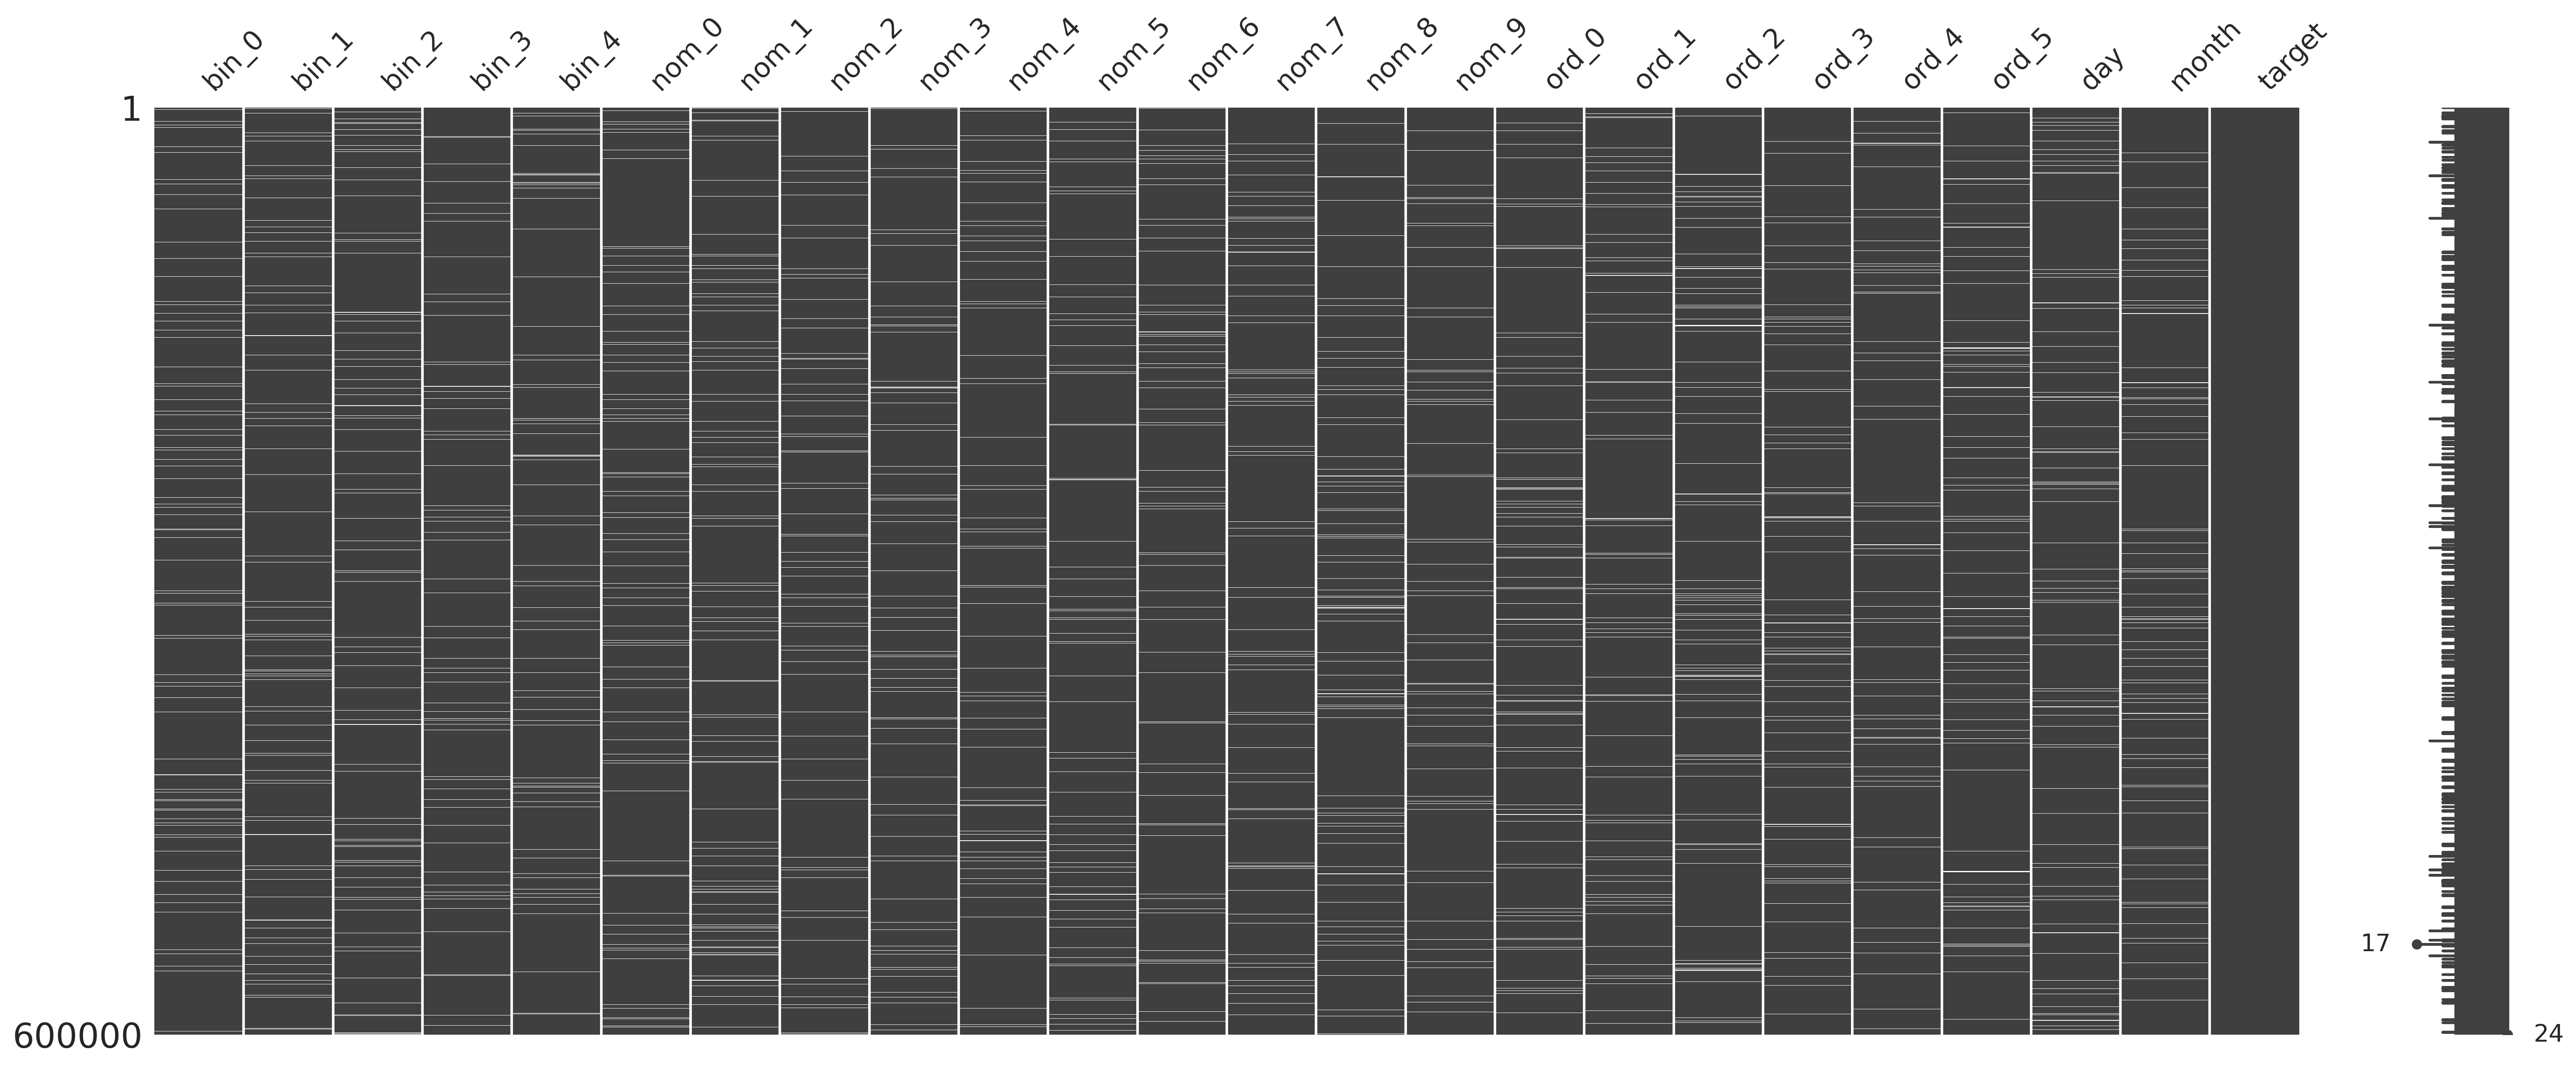

In [6]:
msno.matrix(train)
plt.show()

This data seems to have a lot of missing value unlike last time.

Let's look at the sorted values.

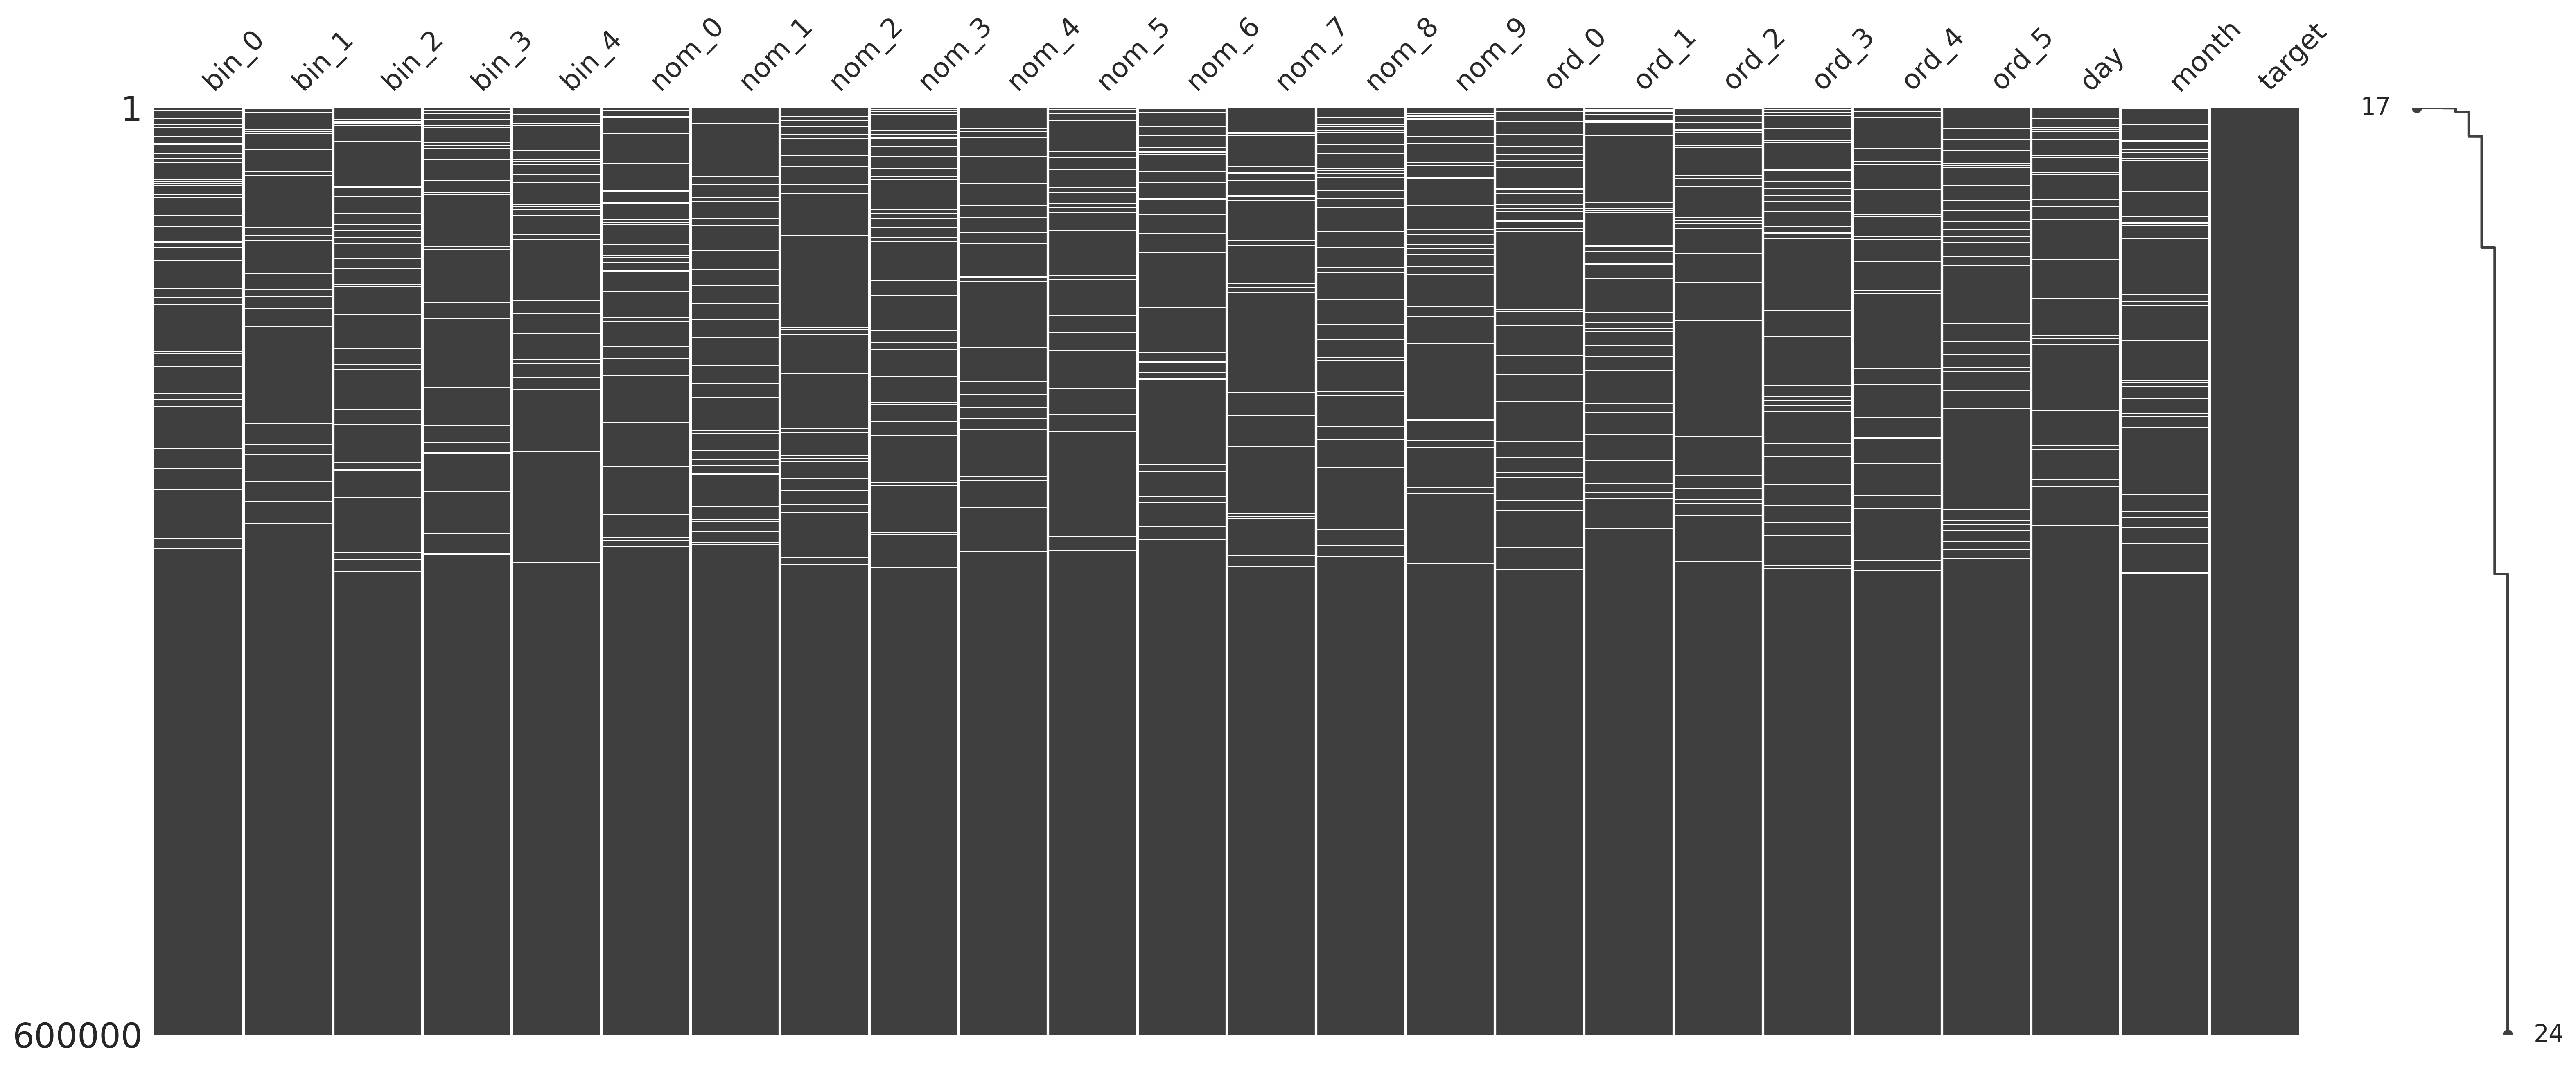

In [7]:
msno.matrix(train, sort='ascending')
plt.show()

You can see that about half are empty.

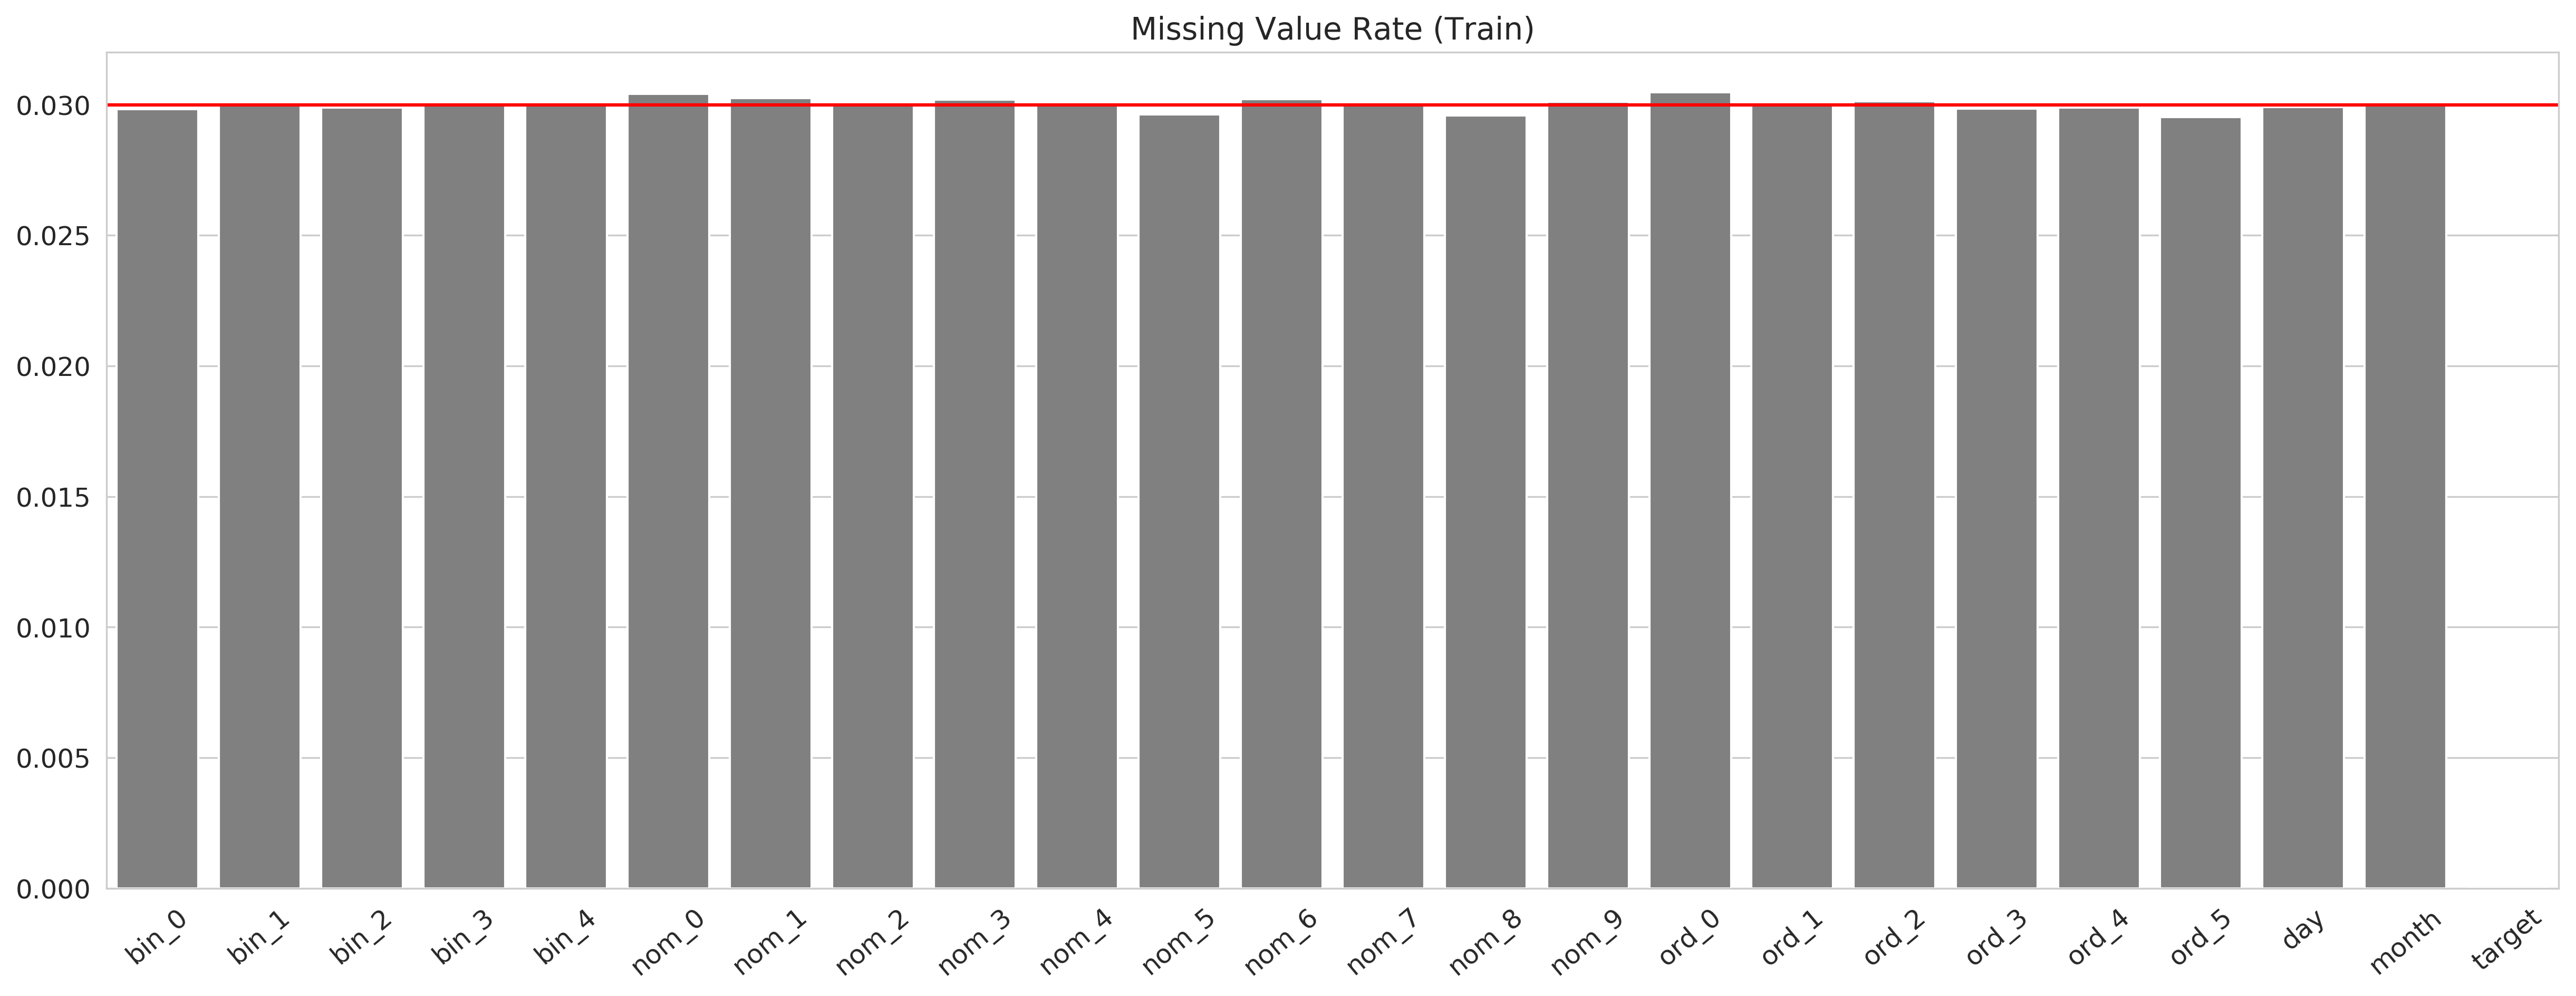

In [8]:
null_rate = [train[i].isna().sum() / len(train) for i in train.columns]
fig, ax = plt.subplots(1,1,figsize=(20, 7))
sns.barplot(x=train.columns, y=null_rate, ax=ax,color='gray')
ax.set_title("Missing Value Rate (Train)")
ax.set_xticklabels(train.columns, rotation=40)
ax.axhline(y=0.03, color='red')
plt.show()

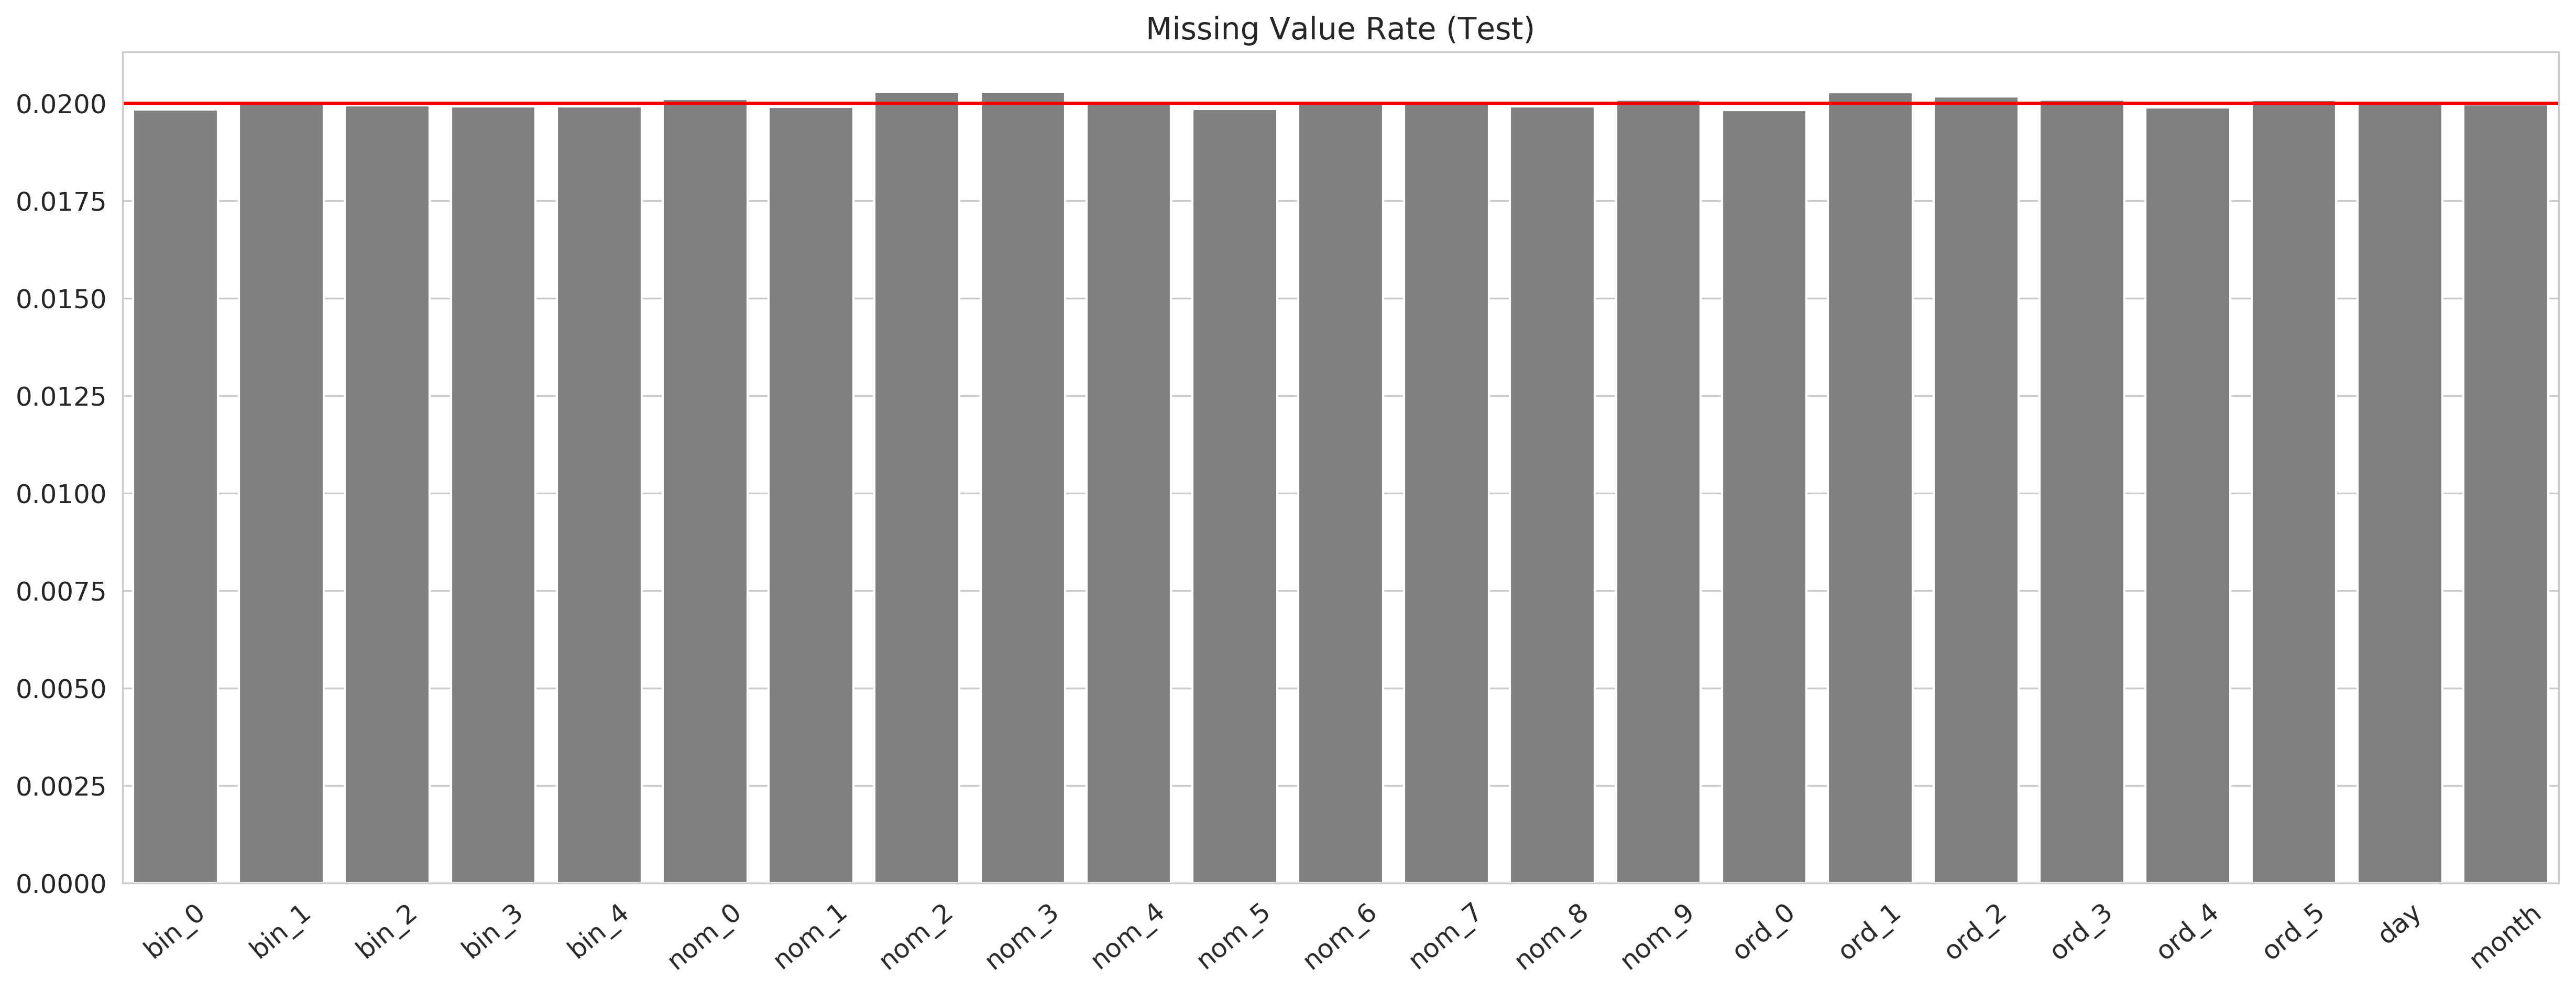

In [9]:
null_rate = [test[i].isna().sum() / len(train) for i in test.columns]
fig, ax = plt.subplots(1,1,figsize=(20, 7))
sns.barplot(x=test.columns, y=null_rate, ax=ax,color='gray')
ax.set_title("Missing Value Rate (Test)")
ax.set_xticklabels(test.columns, rotation=40)
ax.axhline(y=0.02, color='red')
plt.show()

- The missing value (train) seems to make the data roughly 3%.
- The missing value (test) seems to make the data roughly 2%.

What about the target value distribution?

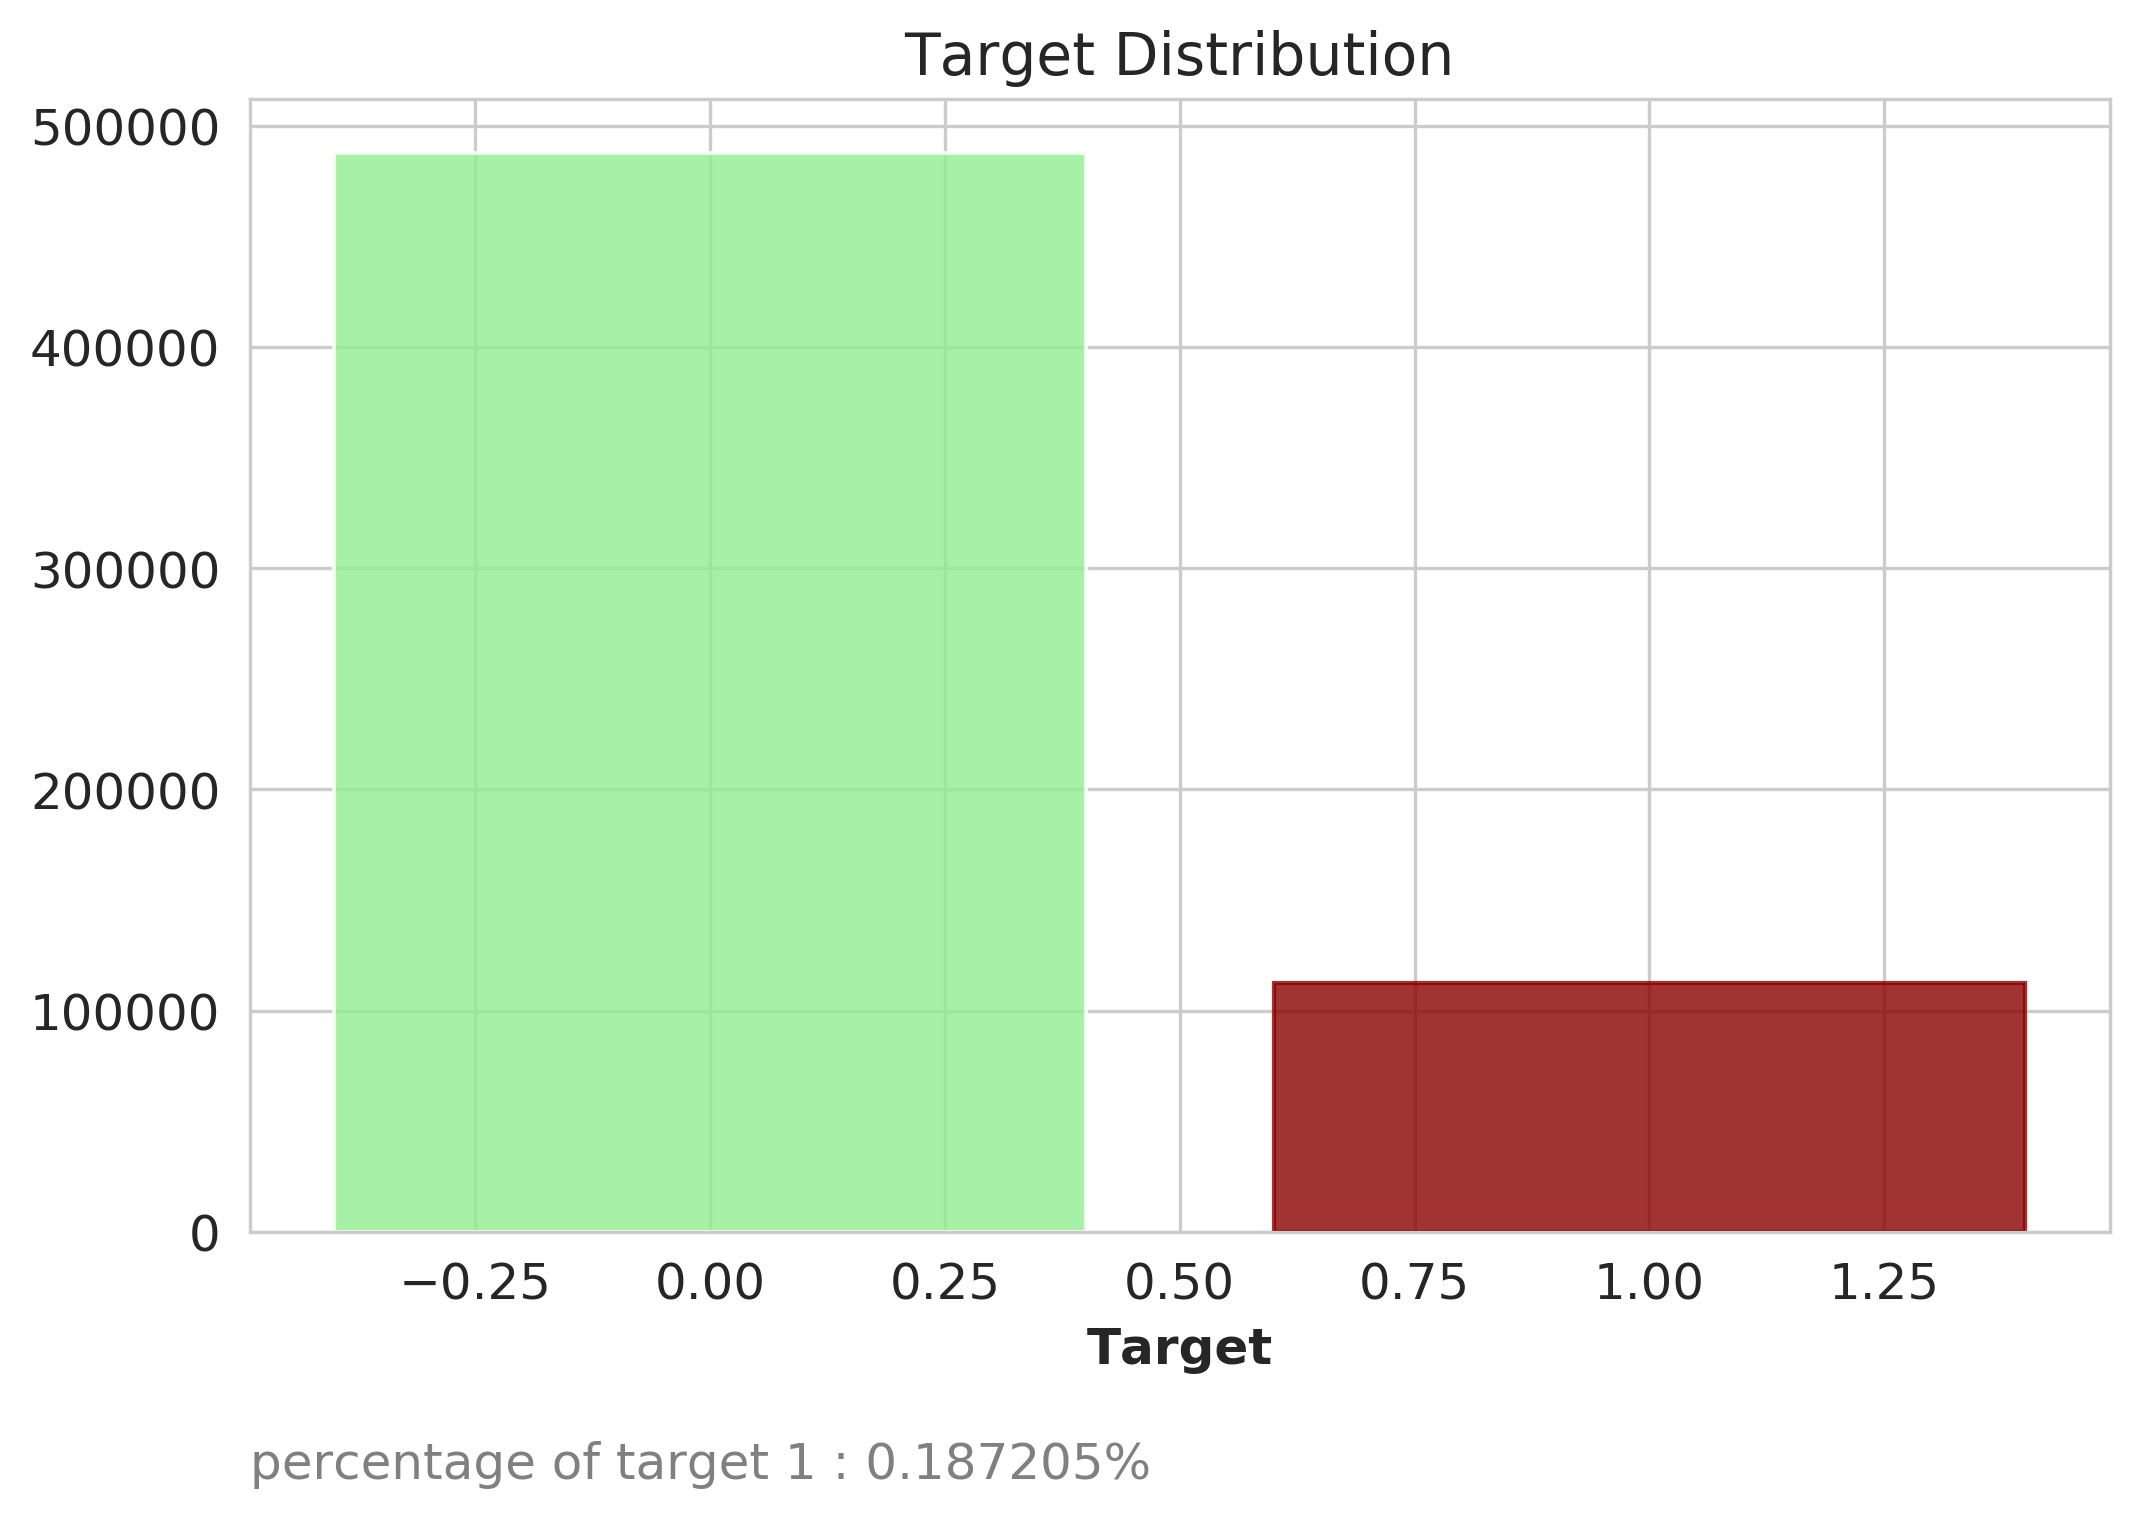

In [10]:
target_dist = target.value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8,5))

barplot = plt.bar(target_dist.index, target_dist, color = 'lightgreen', alpha = 0.8)
barplot[1].set_color('darkred')

ax.set_title('Target Distribution')
ax.annotate("percentage of target 1 : {}%".format(target.sum() / len(target)),
              xy=(0, 0),xycoords='axes fraction', 
              xytext=(0,-50), textcoords='offset points',
              va="top", ha="left", color='grey',
              bbox=dict(boxstyle='round', fc="w", ec='w'))

plt.xlabel('Target', fontsize = 12, weight = 'bold')
plt.show()

First of all, you can see that the target ratio is unbalanced, rather than last data.

## Binary Feature

Let's start with the **binary feature.**

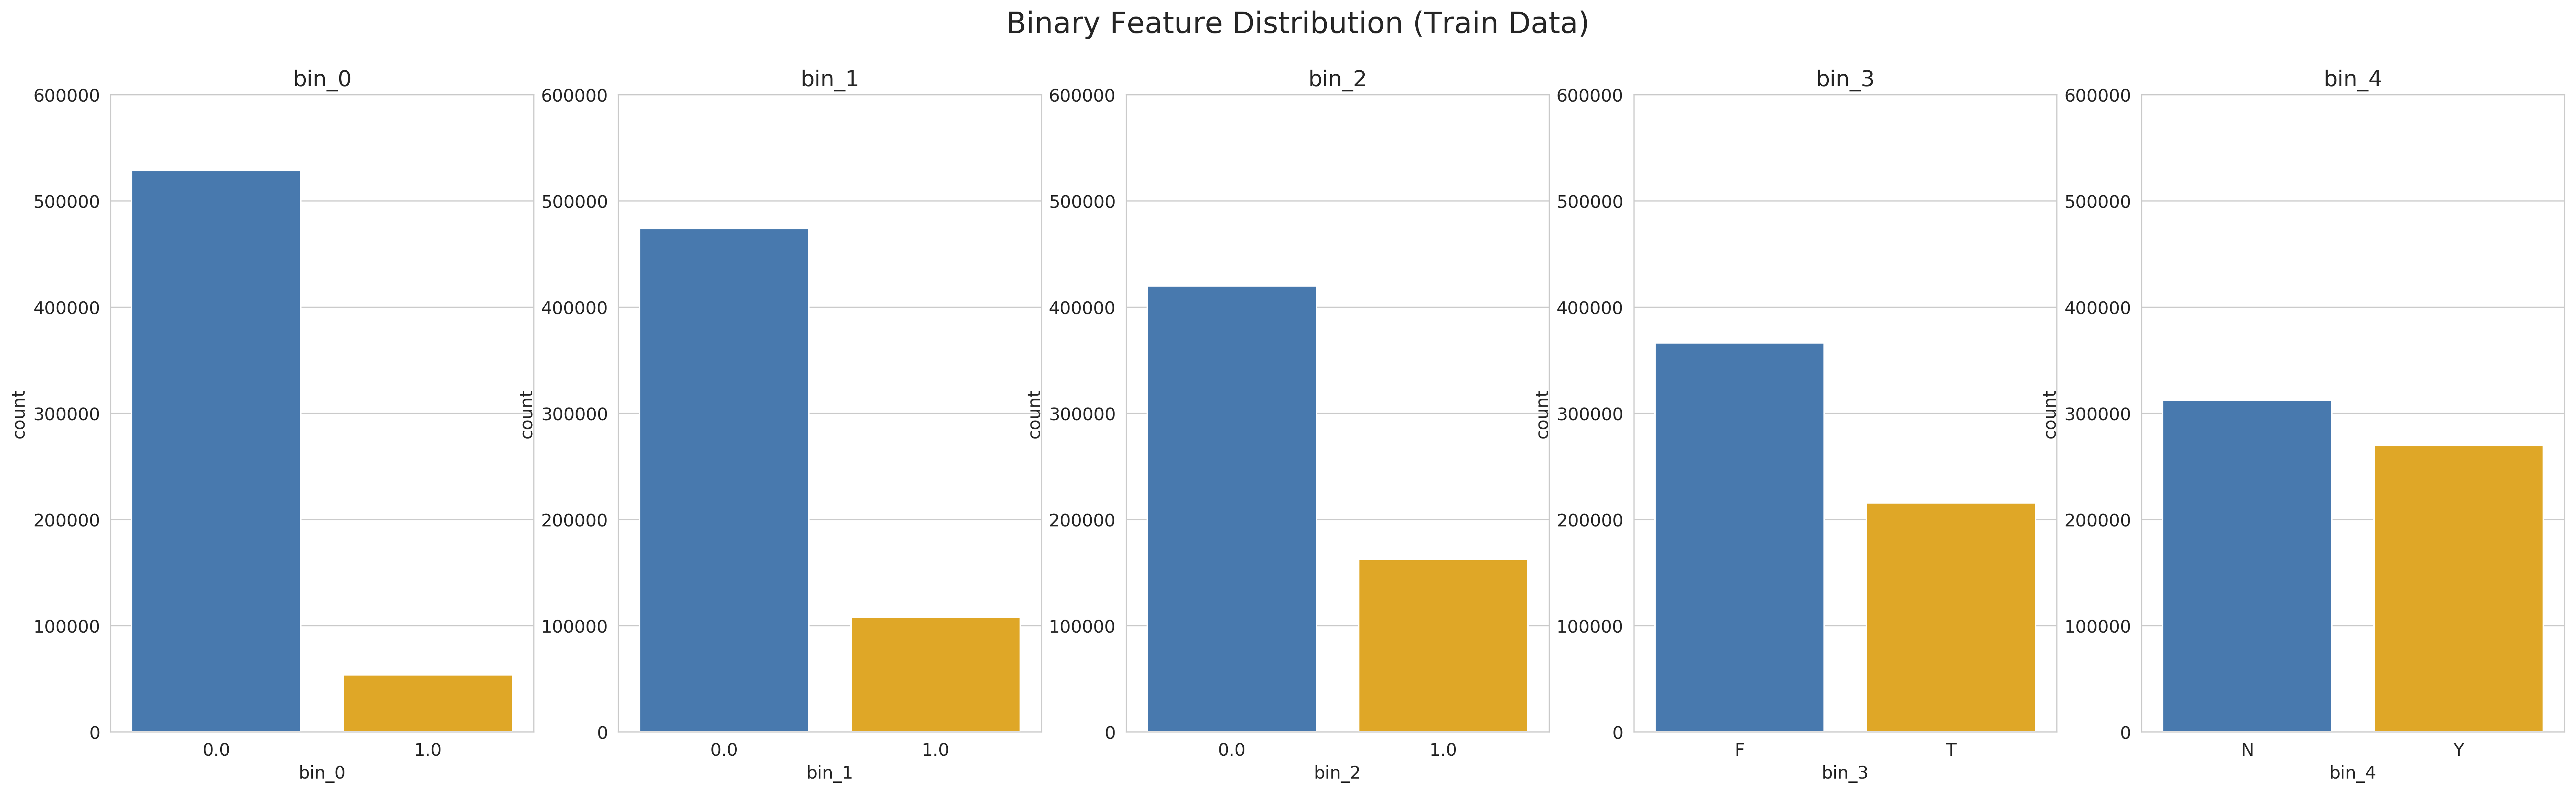

In [11]:
fig, ax = plt.subplots(1,5, figsize=(30, 8))
for i in range(5): 
    sns.countplot(f'bin_{i}', data= train, ax=ax[i])
    ax[i].set_ylim([0, 600000])
    ax[i].set_title(f'bin_{i}', fontsize=15)
fig.suptitle("Binary Feature Distribution (Train Data)", fontsize=20)
plt.show()

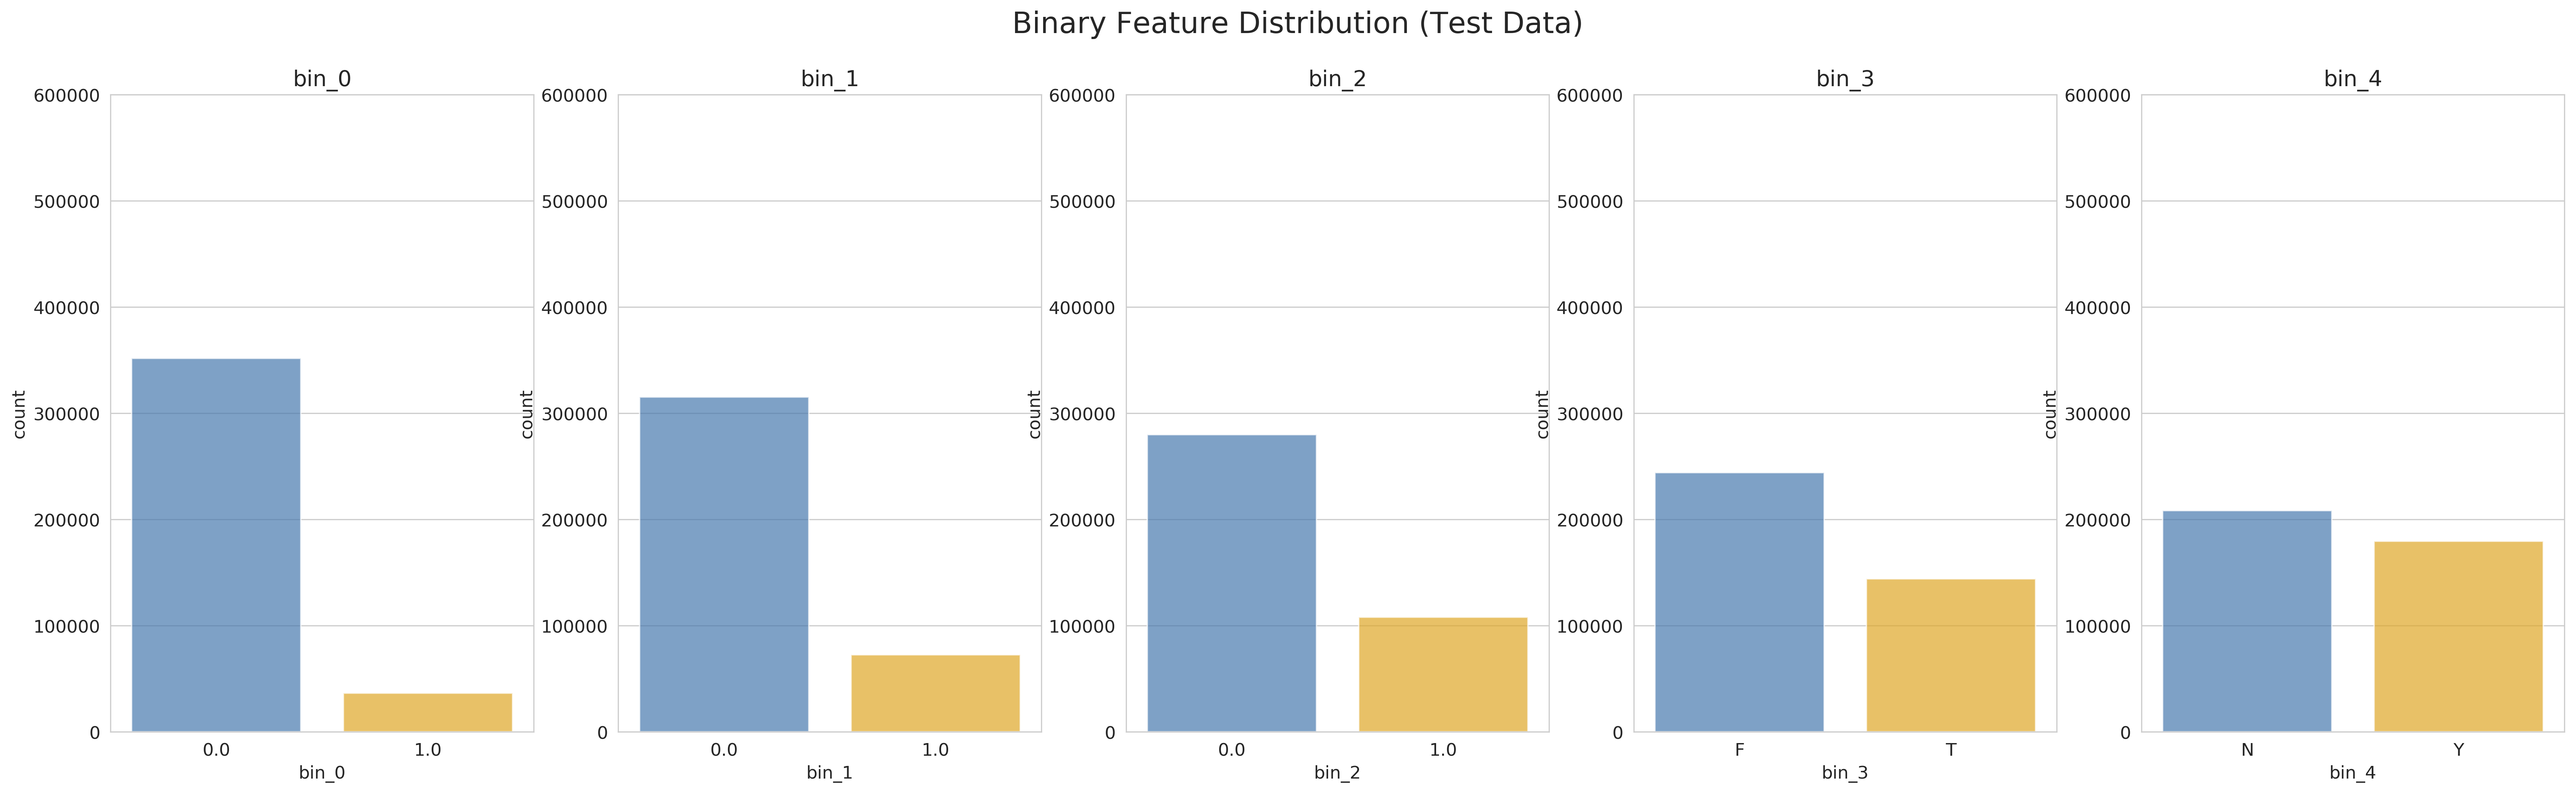

In [12]:
fig, ax = plt.subplots(1,5, figsize=(30, 8))
for i in range(5): 
    sns.countplot(f'bin_{i}', data= test, ax=ax[i], alpha=0.7,
                 order=test[f'bin_{i}'].value_counts().index)
    ax[i].set_ylim([0, 600000])
    ax[i].set_title(f'bin_{i}', fontsize=15)
fig.suptitle("Binary Feature Distribution (Test Data)", fontsize=20)
plt.show()

The overall `binary feature` distribution between `train` and `test` seems to be similar.

It can be seen that as $i$ of ${bin}_i$ increases, the distribution approaches 50%.

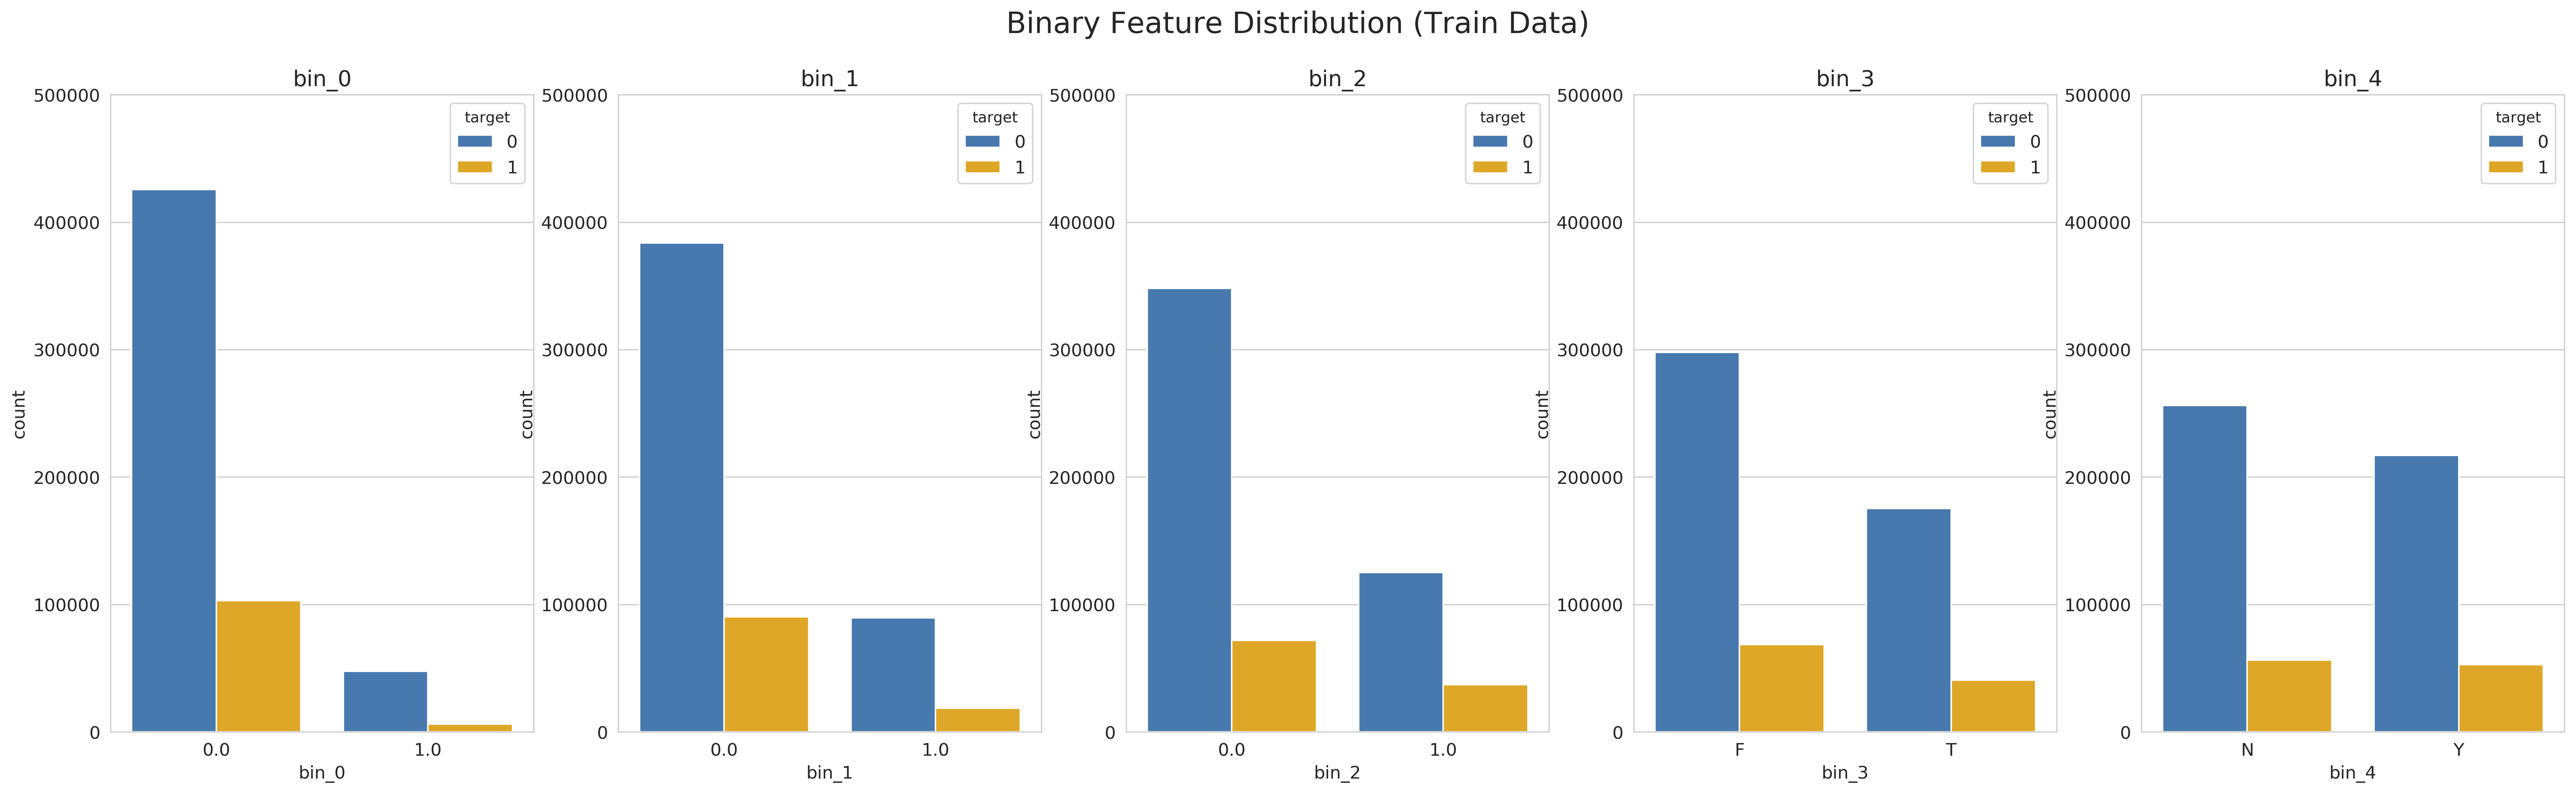

In [13]:
fig, ax = plt.subplots(1,5, figsize=(30, 8))
for i in range(5): 
    sns.countplot(f'bin_{i}', hue='target', data= train, ax=ax[i])
    ax[i].set_ylim([0, 500000])
    ax[i].set_title(f'bin_{i}', fontsize=15)
fig.suptitle("Binary Feature Distribution (Train Data)", fontsize=20)
plt.show()

## Nominal Feature

From nominal data, we need to look more closely at the distribution.

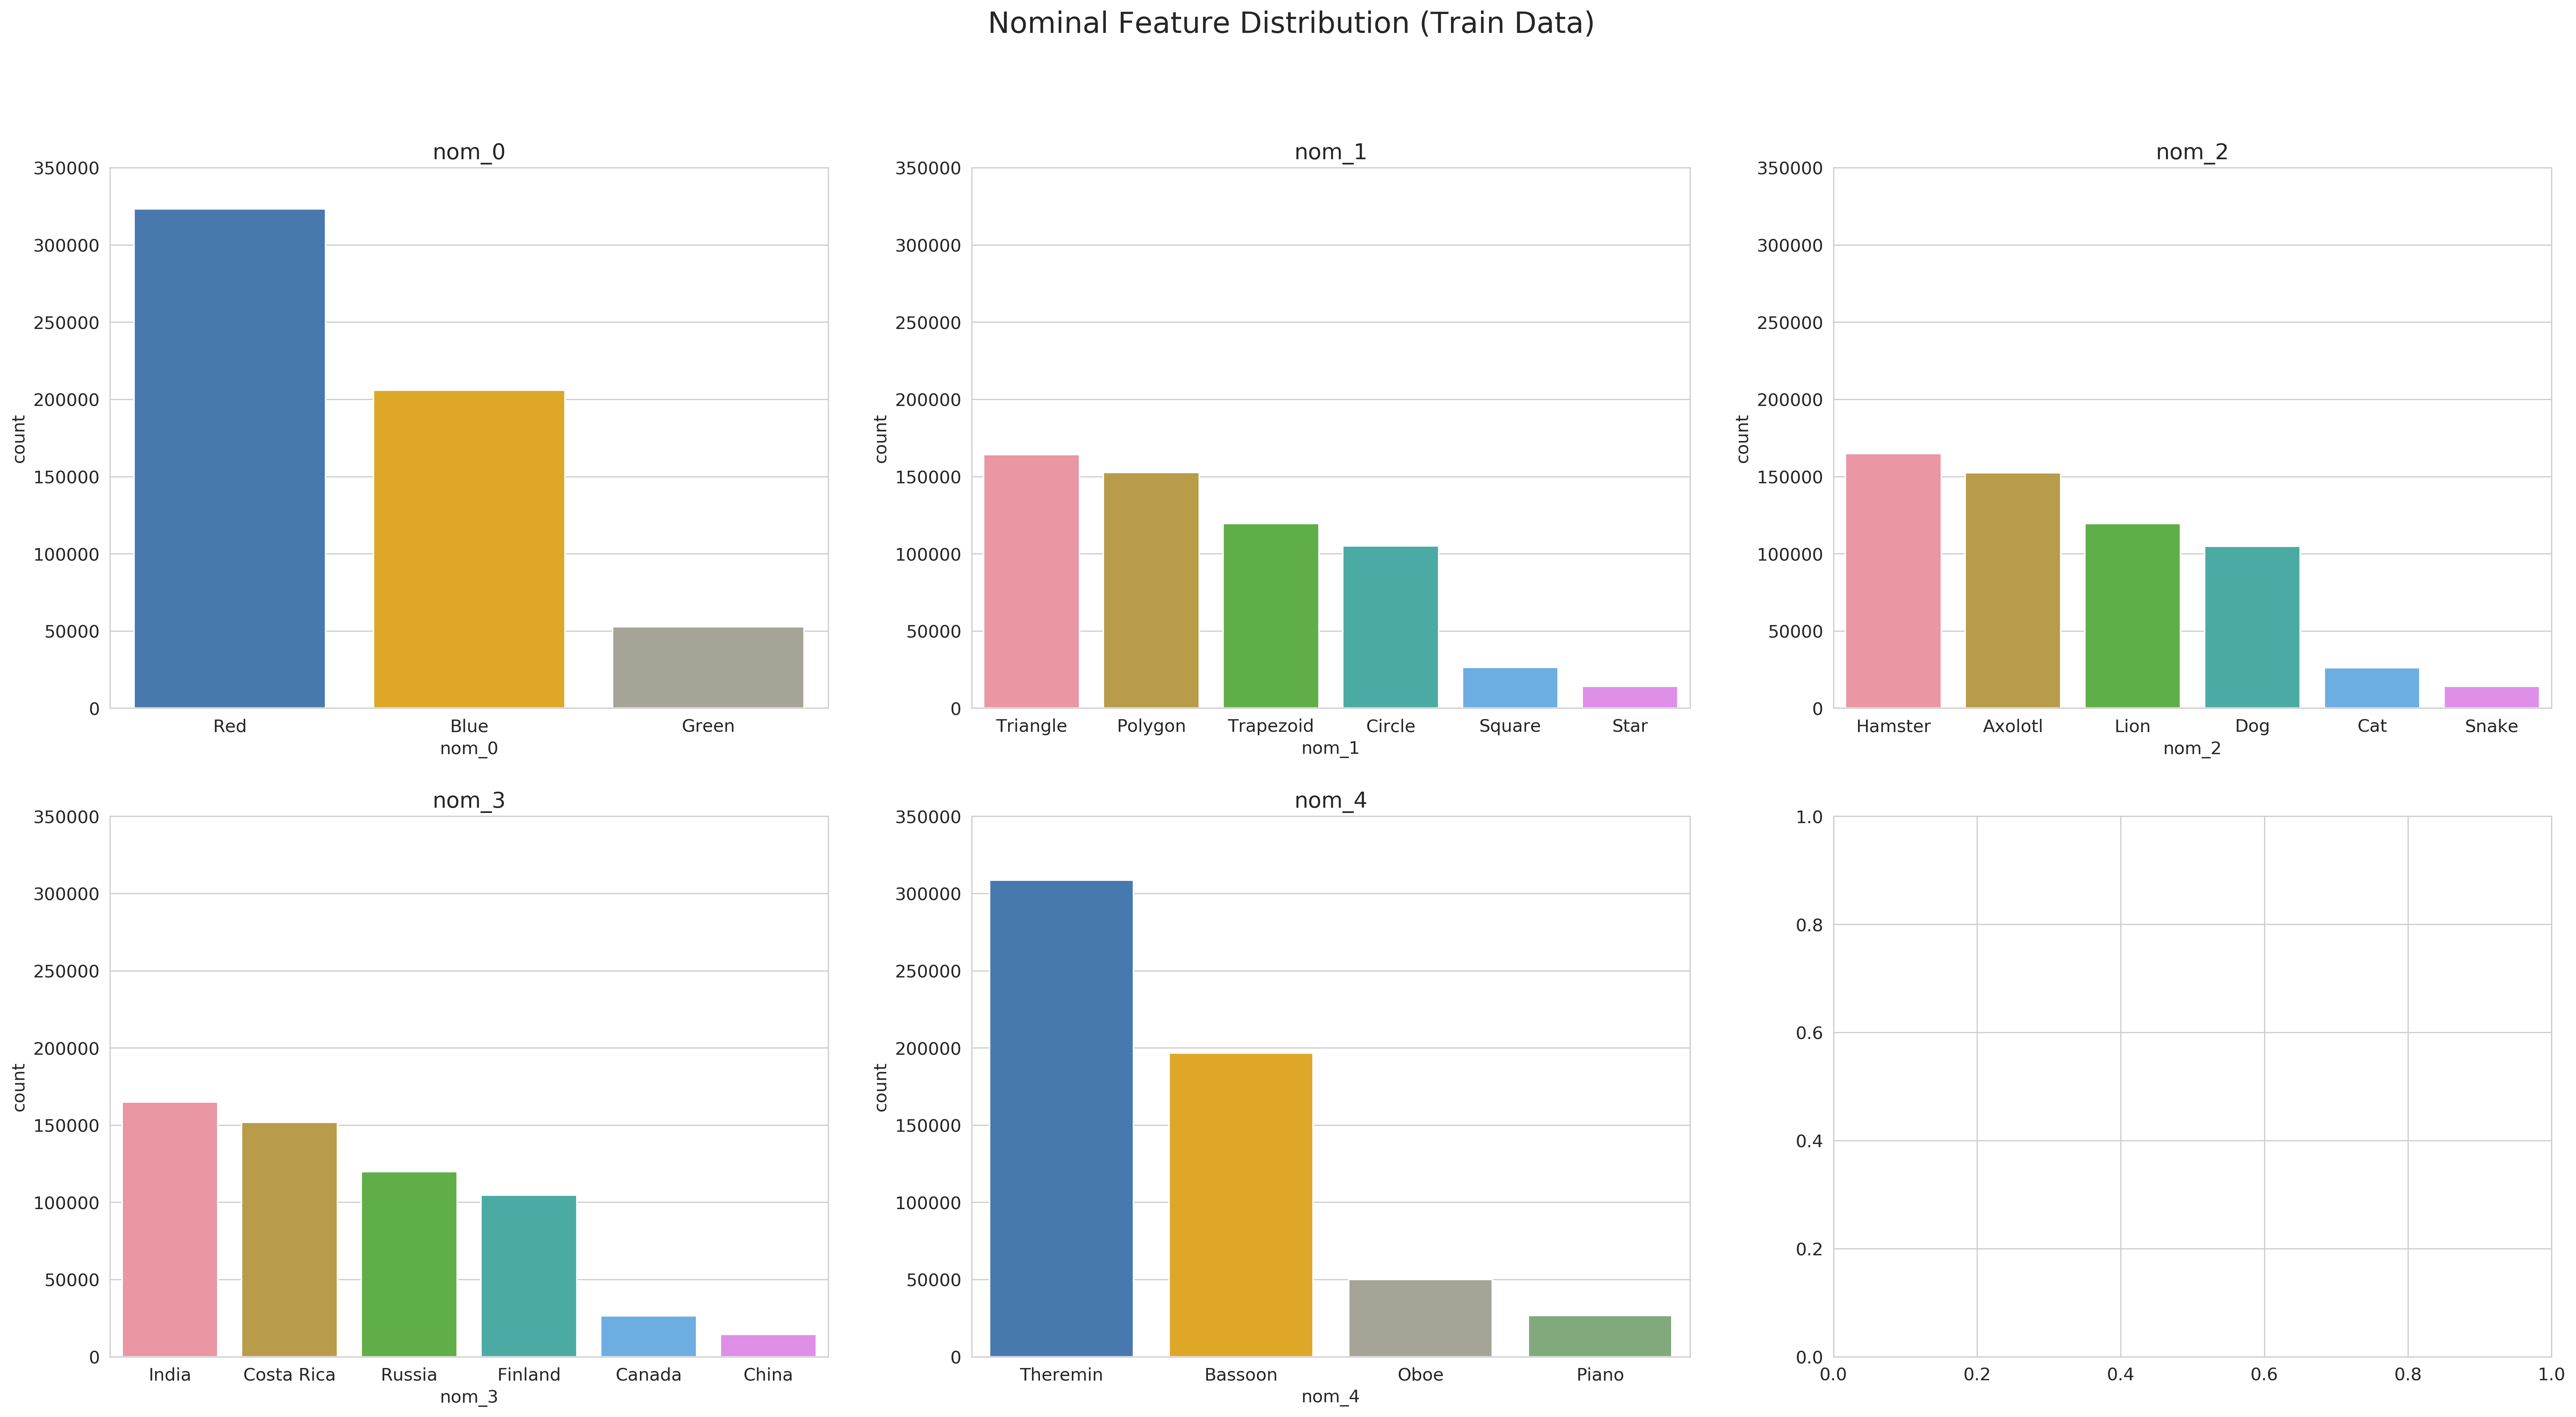

In [14]:
fig, ax = plt.subplots(2,3, figsize=(30, 15))
for i in range(5): 
    sns.countplot(f'nom_{i}', data= train, ax=ax[i//3][i%3],
                 order=train[f'nom_{i}'].value_counts().index)
    ax[i//3][i%3].set_ylim([0, 350000])
    ax[i//3][i%3].set_title(f'nom_{i}', fontsize=15)
fig.suptitle("Nominal Feature Distribution (Train Data)", fontsize=20)
plt.show()

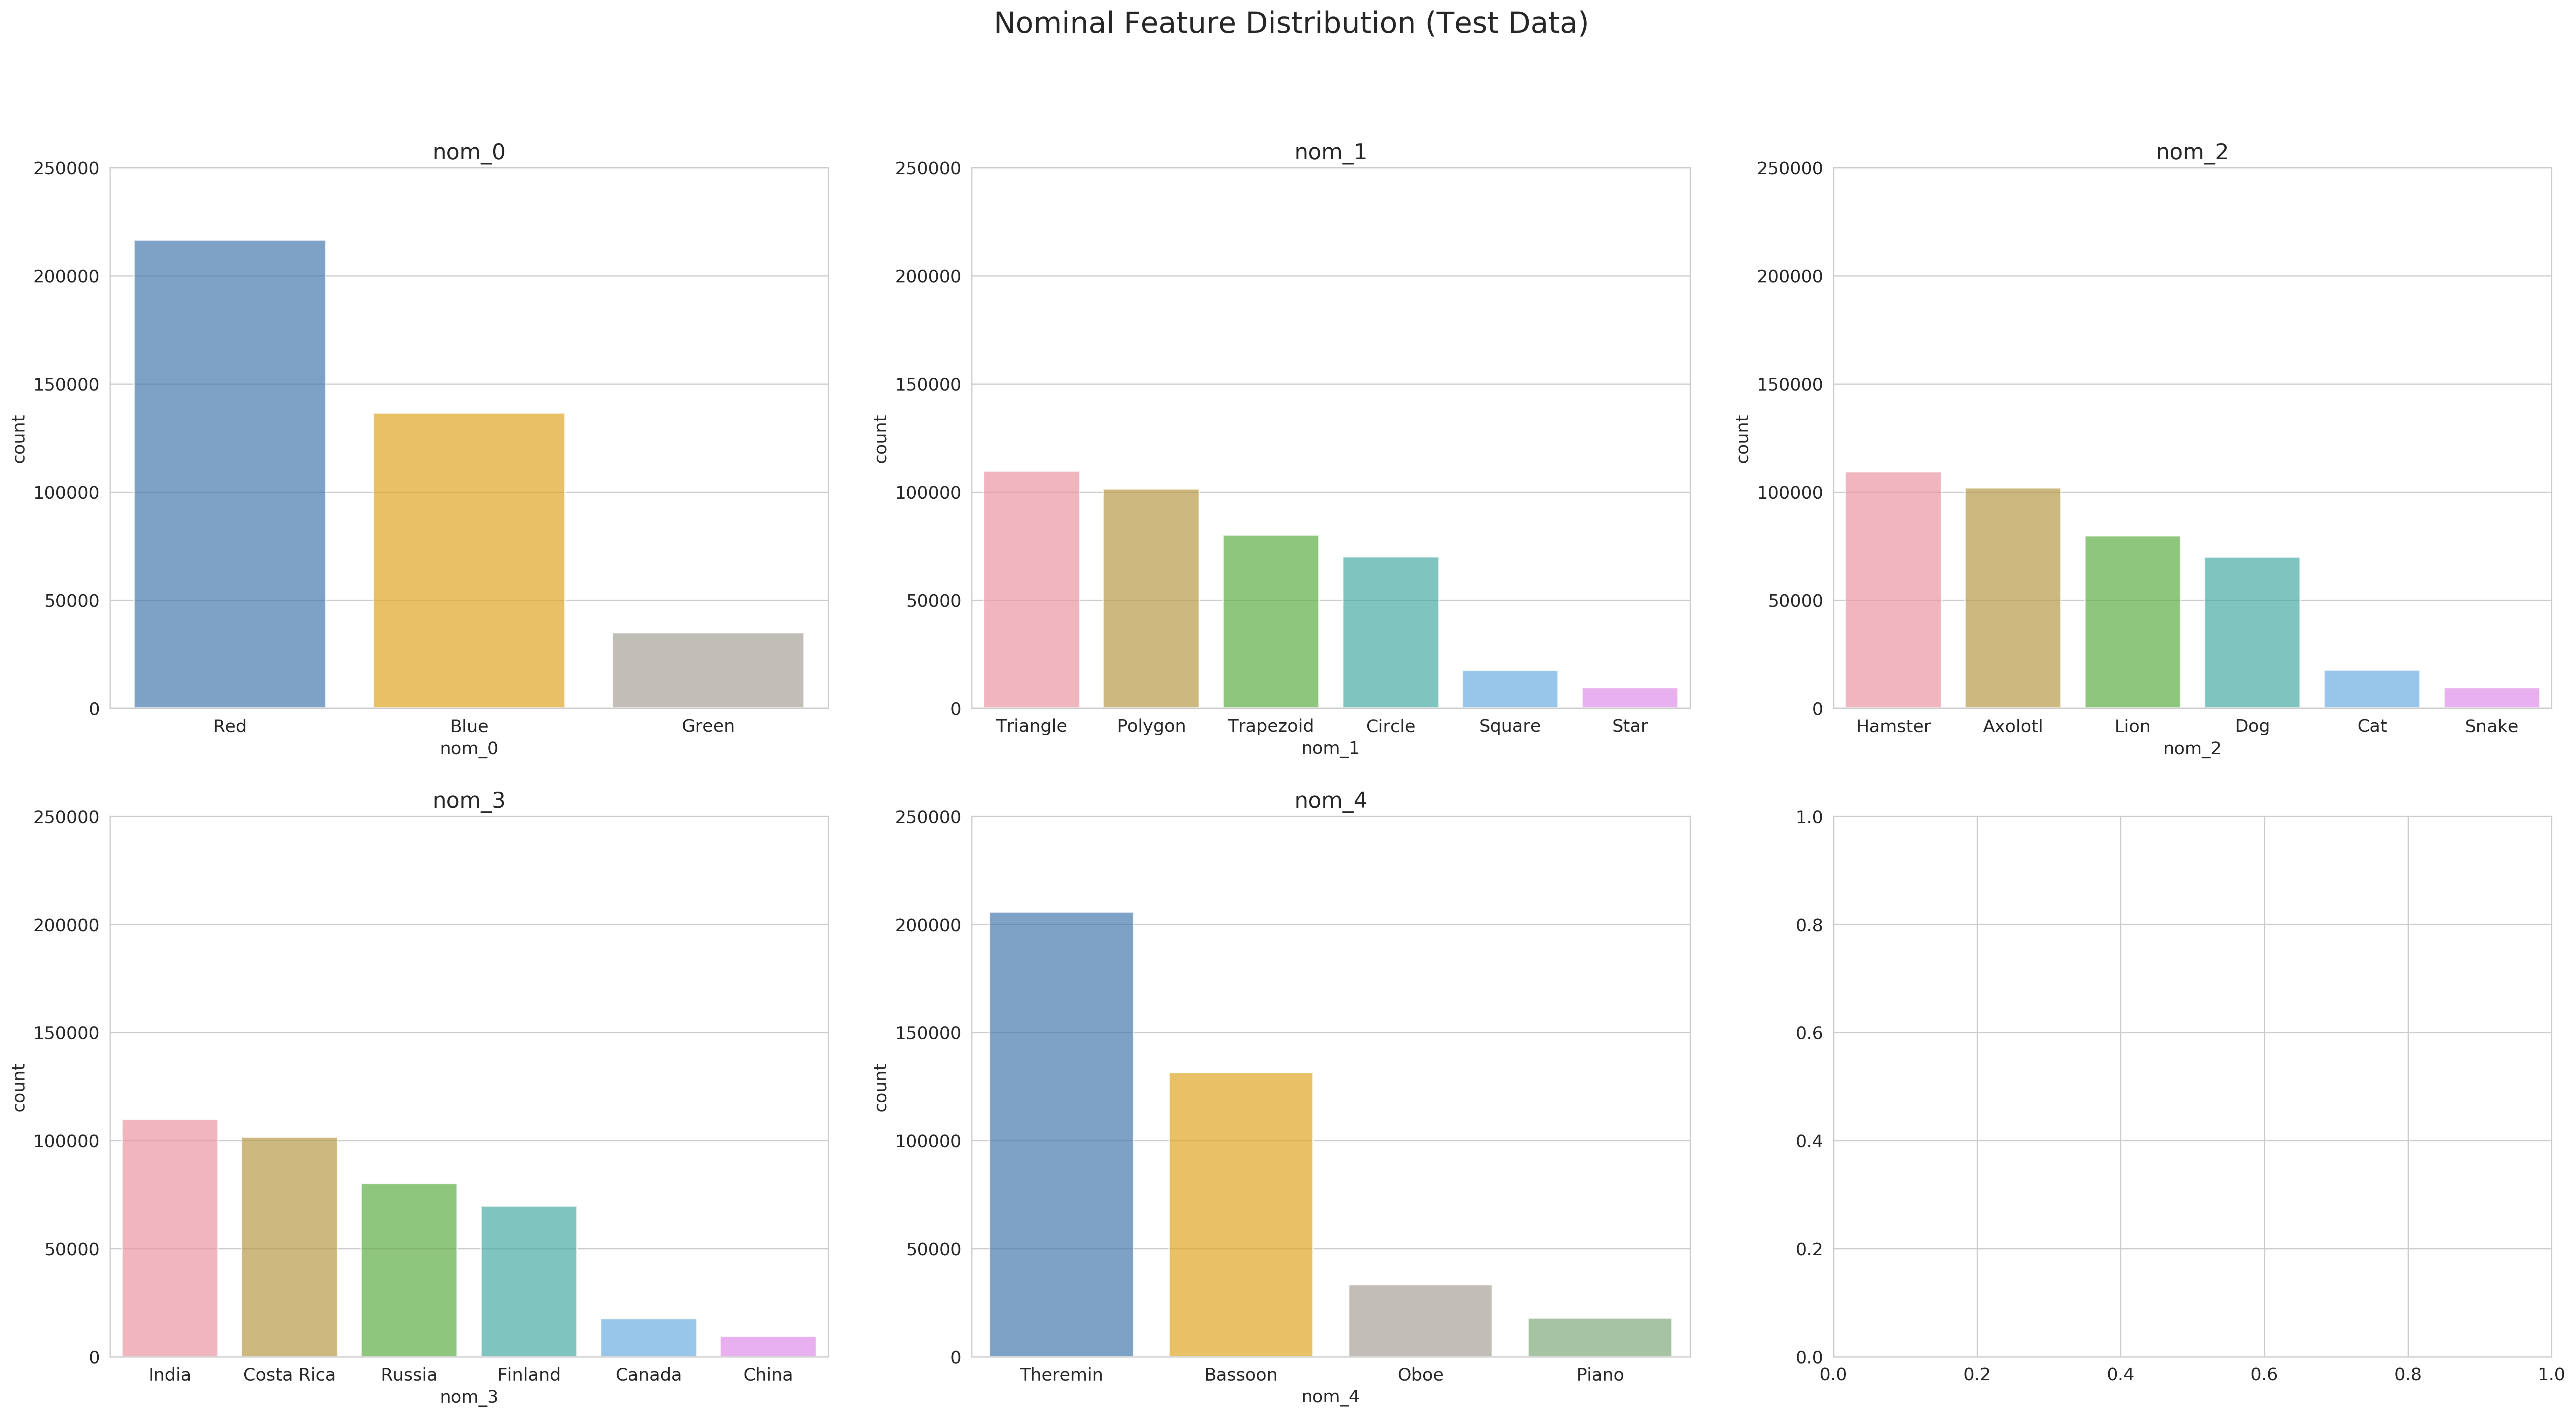

In [15]:
fig, ax = plt.subplots(2,3, figsize=(30, 15))
for i in range(5): 
    sns.countplot(f'nom_{i}', data= test, ax=ax[i//3][i%3],
                 order=test[f'nom_{i}'].value_counts().index,
                 alpha=0.7)
    ax[i//3][i%3].set_ylim([0, 250000])
    ax[i//3][i%3].set_title(f'nom_{i}', fontsize=15)
fig.suptitle("Nominal Feature Distribution (Test Data)", fontsize=20)
plt.show()

The overall `nominal feature` distribution between `train` and `test` seems to be similar.

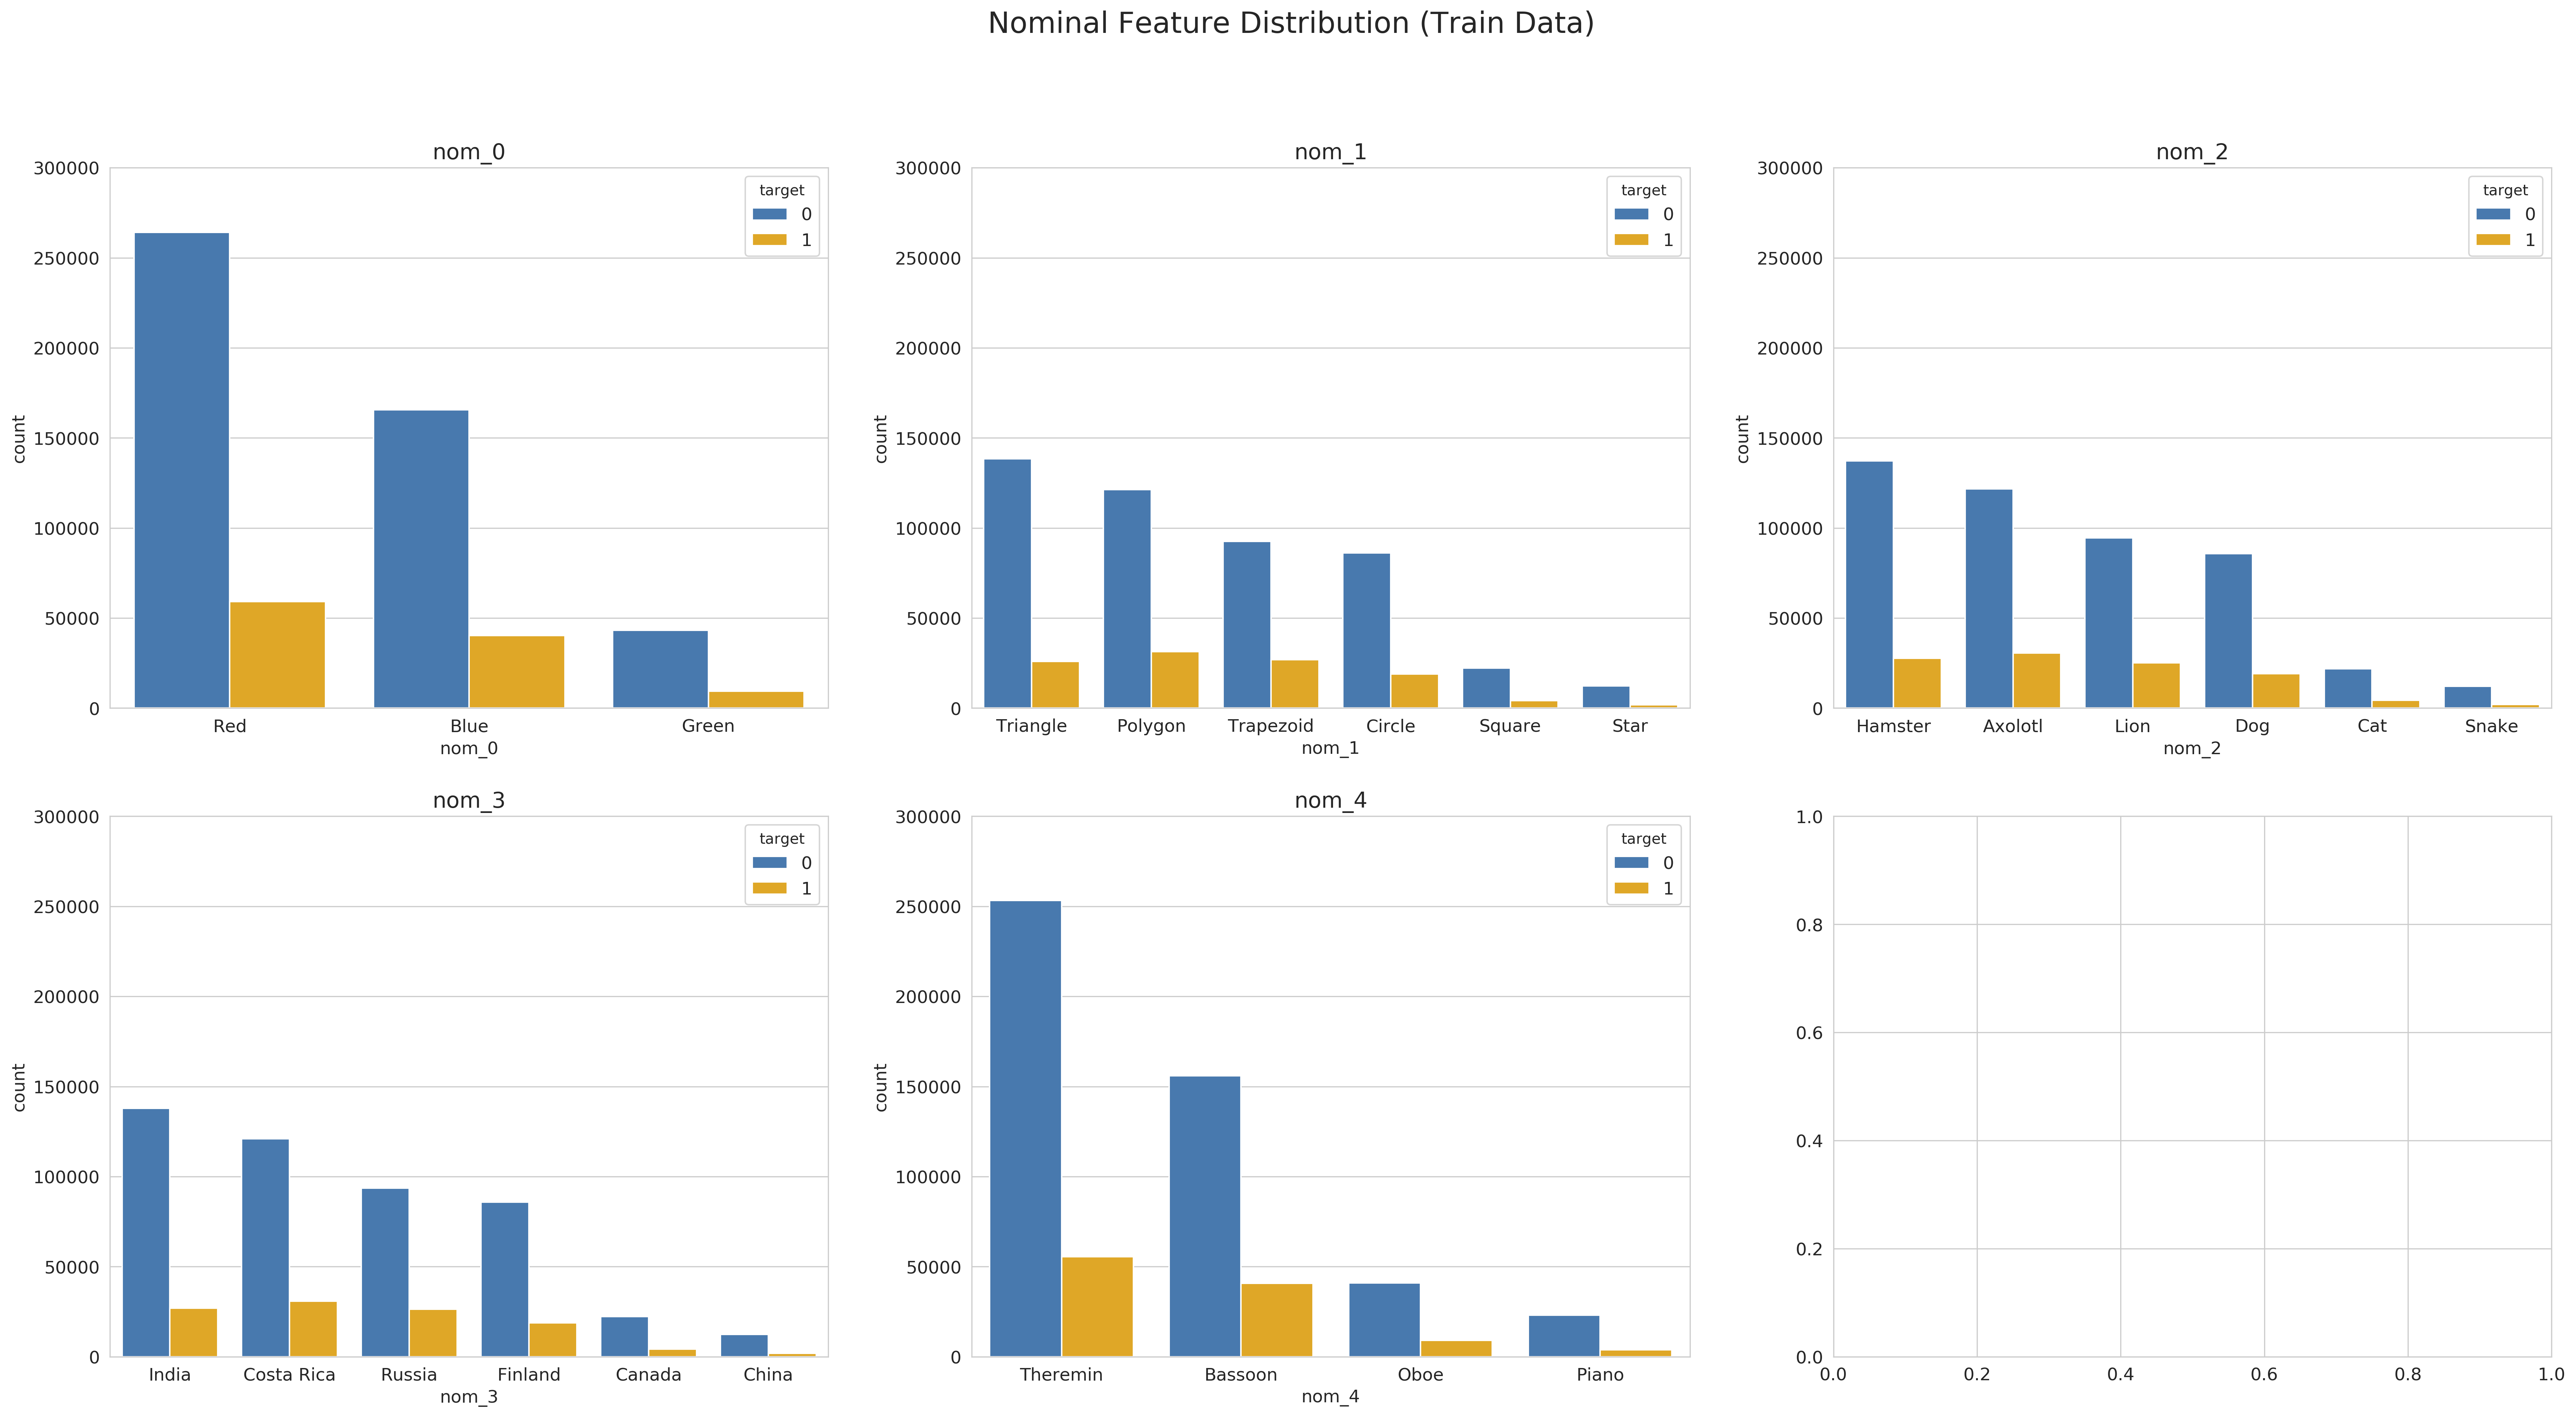

In [16]:
fig, ax = plt.subplots(2,3, figsize=(30, 15))
for i in range(5): 
    sns.countplot(f'nom_{i}', hue='target', data= train, ax=ax[i//3][i%3],
                 order=train[f'nom_{i}'].value_counts().index)
    ax[i//3][i%3].set_ylim([0, 300000])
    ax[i//3][i%3].set_title(f'nom_{i}', fontsize=15)
fig.suptitle("Nominal Feature Distribution (Train Data)", fontsize=20)
plt.show()

In [17]:
for i in range(5):
    data = train[[f'nom_{i}', 'target']].groupby(f'nom_{i}')['target'].value_counts().unstack()
    data['rate'] = data[1]  / (data[0] + data[1] )
    data.sort_values(by=['rate'], inplace=True)
    display(data.style.highlight_max(color='lightgreen').highlight_min(color='#cd4f39'))

The visualization took too long and we looked at the rest of the features and found many unique elements:

In [18]:
train[[f'nom_{i}' for i in range(5, 10)]].describe(include='O')

nom_5      nom_6      nom_7      nom_8      nom_9
count      582222     581869     581997     582245     581927
unique       1220       1519        222        222       2218
top     fc8fc7e56  ea8c5e181  4ae48e857  7d7c02c57  8f3276a6e
freq          977        805       5035       5052        565

There seems to be something similar between `nom_7` and `nom_8`.

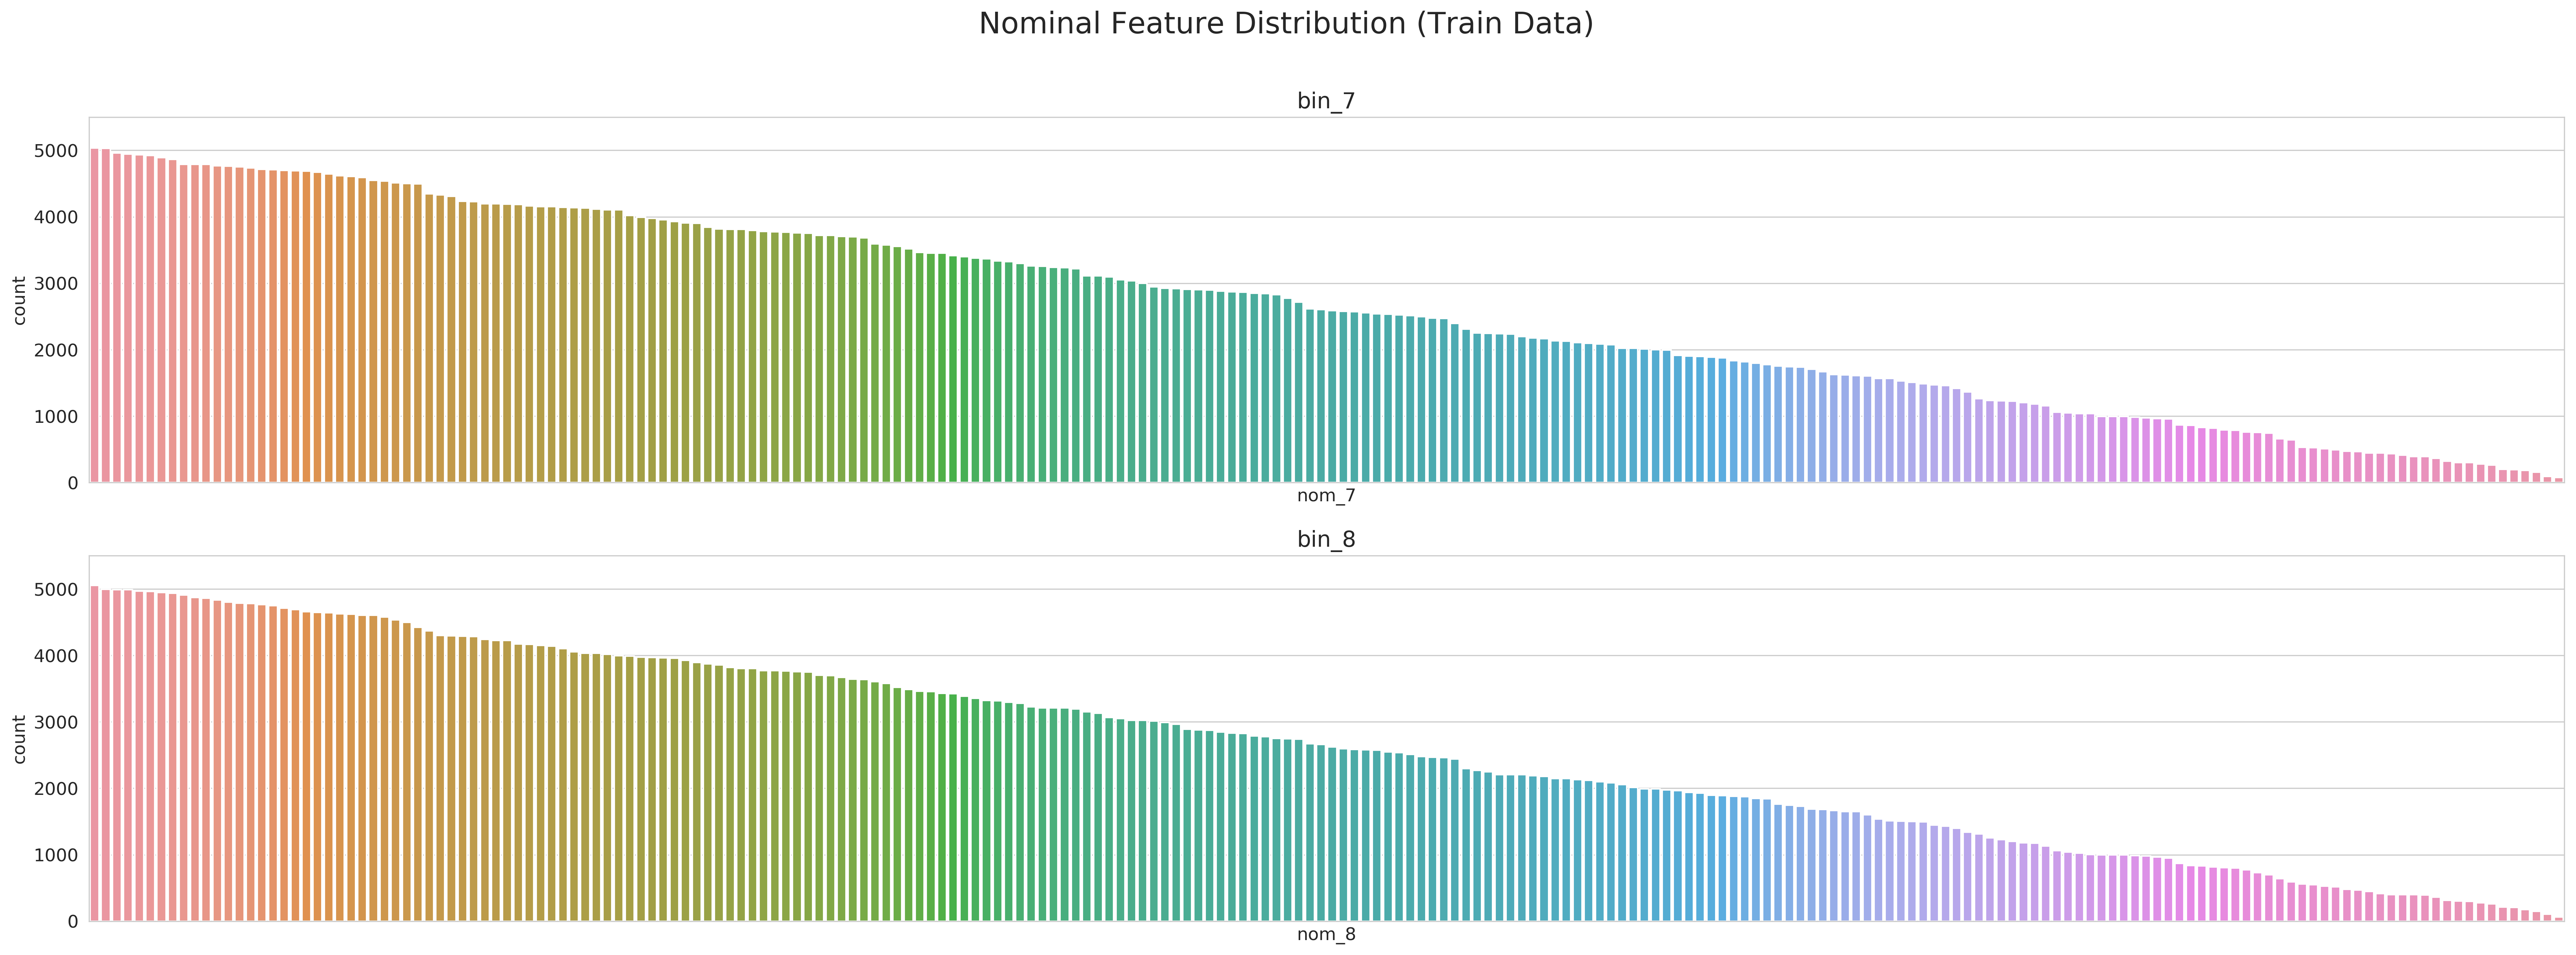

In [19]:
fig, ax = plt.subplots(2,1, figsize=(30, 10))
for i in range(7,9): 
    sns.countplot(f'nom_{i}', data= train, ax=ax[i-7],
                  order = train[f'nom_{i}'].dropna().value_counts().index)
    ax[i-7].set_ylim([0, 5500])
    ax[i-7].set_title(f'bin_{i}', fontsize=15)
    ax[i-7].set_xticks([])
fig.suptitle("Nominal Feature Distribution (Train Data)", fontsize=20)
plt.show()

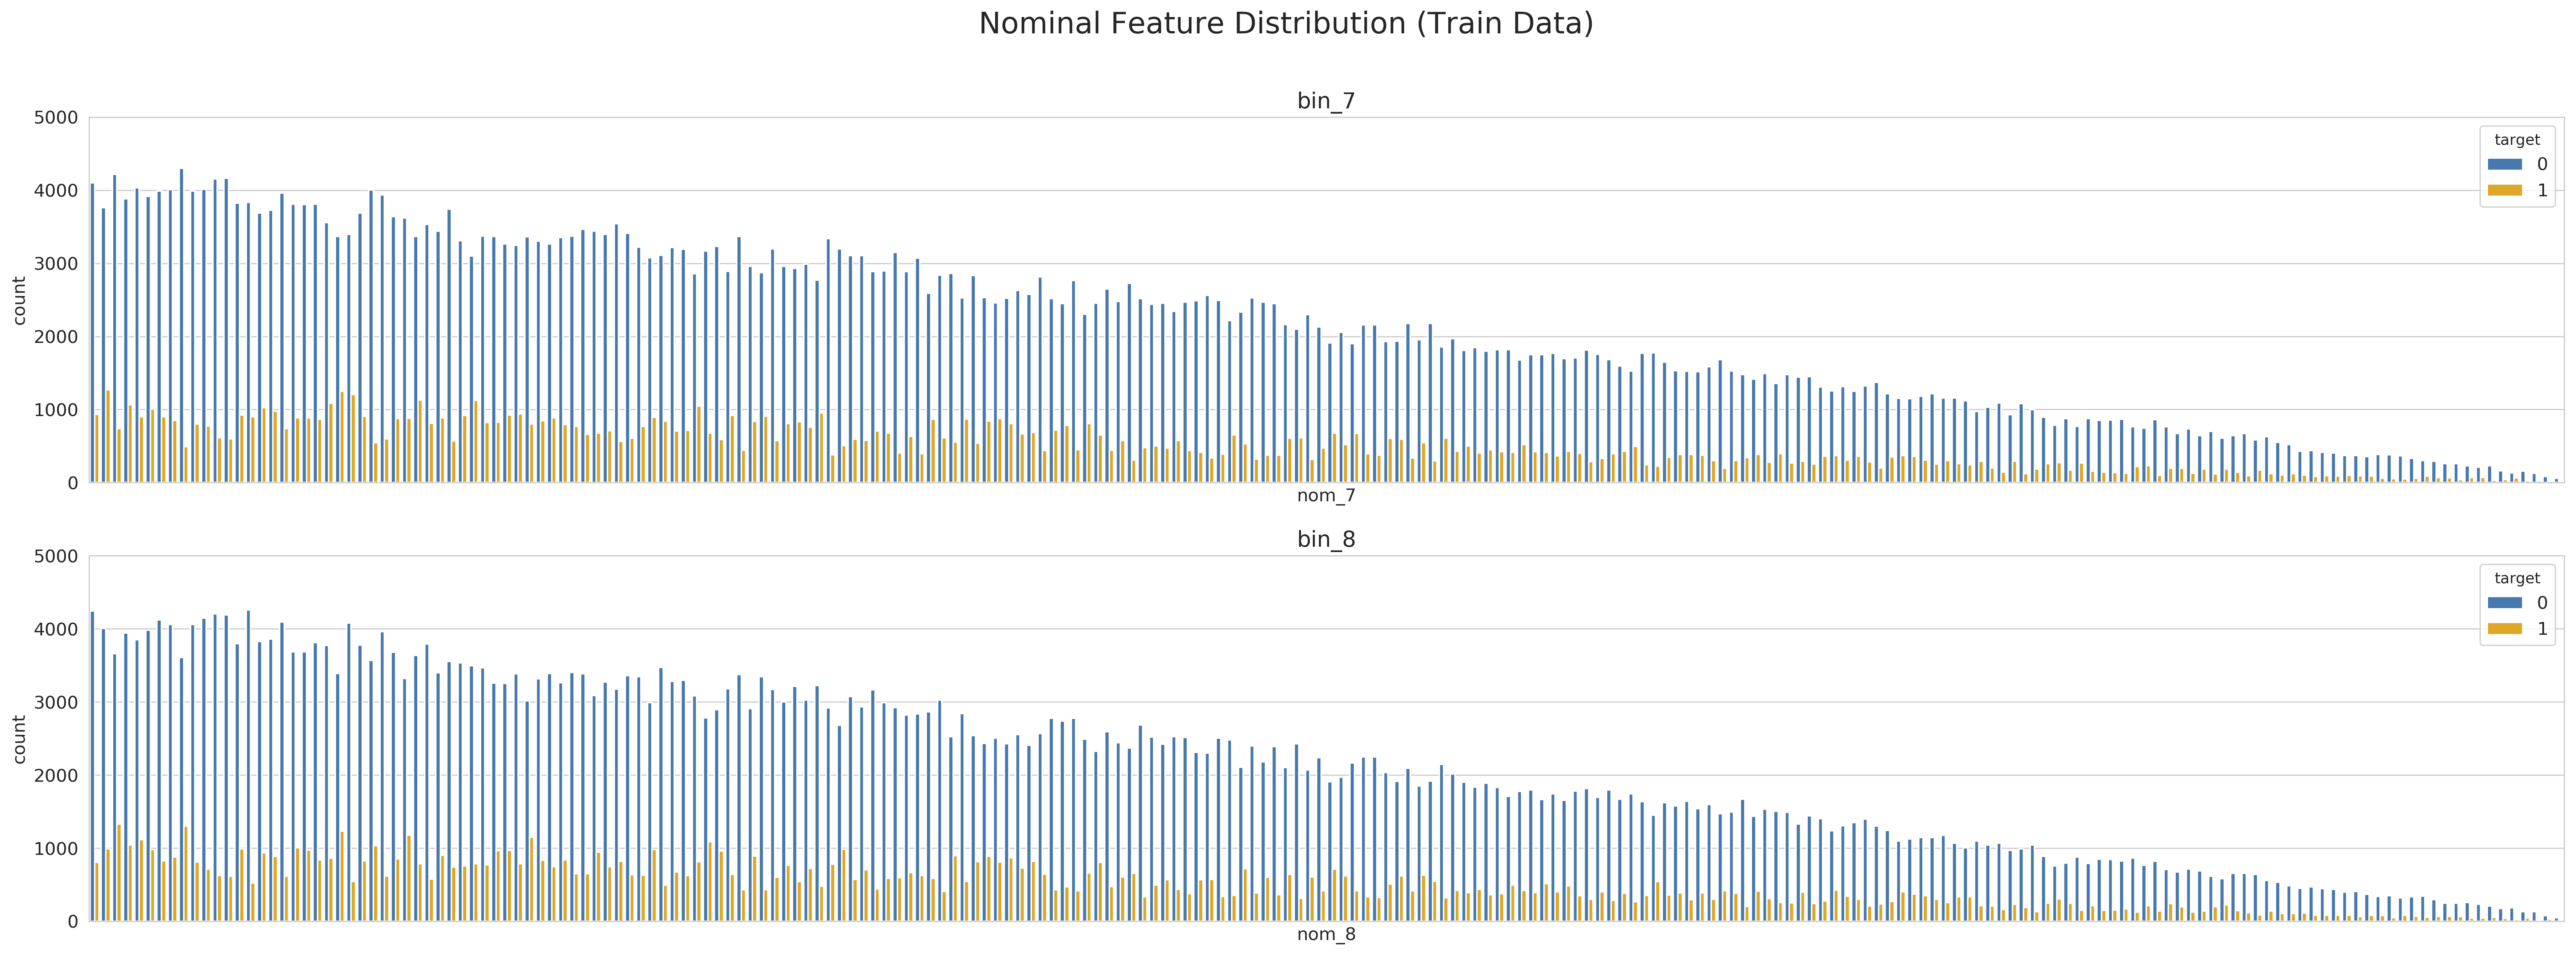

In [20]:
fig, ax = plt.subplots(2,1, figsize=(30, 10))
for i in range(7,9): 
    sns.countplot(f'nom_{i}', hue='target', data= train, ax=ax[i-7],
                  order = train[f'nom_{i}'].dropna().value_counts().index)
    ax[i-7].set_ylim([0, 5000])
    ax[i-7].set_title(f'bin_{i}', fontsize=15)
    ax[i-7].set_xticks([])
fig.suptitle("Nominal Feature Distribution (Train Data)", fontsize=20)
plt.show()

The comparison after sorting **does not seem** to have **high similarity**. (The distribution looks similar, but it's too different in detail.)

However, given that the numbers are the same and that the bending points on the graph are at similar points in the sort order by size, we assume that there is some preprocessing to see the relationship between the two features.

## Ordinal Feature

In [21]:
train[[f'ord_{i}' for i in range(6)]].describe(include='all')

ord_0   ord_1     ord_2   ord_3   ord_4   ord_5
count   581712.000000  581959    581925  582084  582070  582287
unique            NaN       5         6      15      26     190
top               NaN  Novice  Freezing       n       N      Fl
freq              NaN  160597    142726   70982   39978   10562
mean         1.948224     NaN       NaN     NaN     NaN     NaN
std          0.853904     NaN       NaN     NaN     NaN     NaN
min          1.000000     NaN       NaN     NaN     NaN     NaN
25%          1.000000     NaN       NaN     NaN     NaN     NaN
50%          2.000000     NaN       NaN     NaN     NaN     NaN
75%          3.000000     NaN       NaN     NaN     NaN     NaN
max          3.000000     NaN       NaN     NaN     NaN     NaN

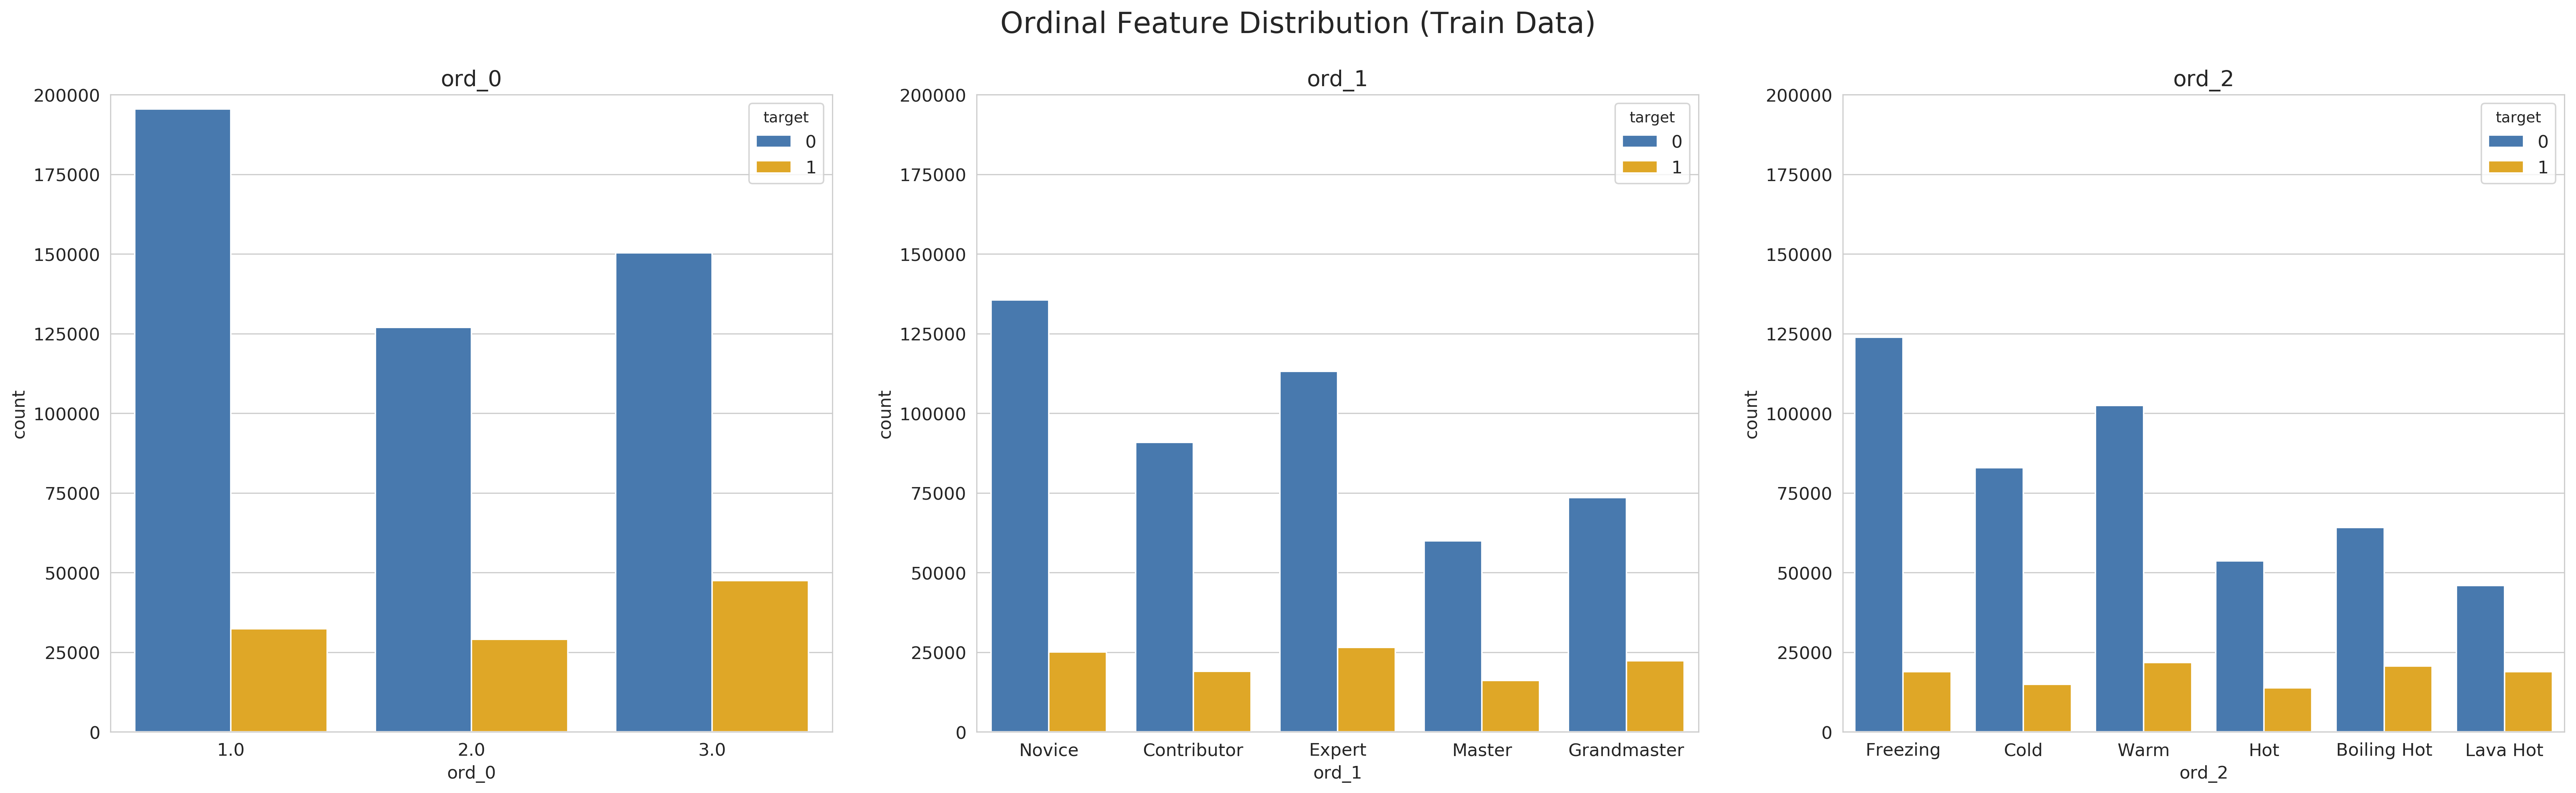

In [22]:
fig, ax = plt.subplots(1,3, figsize=(30, 8))

ord_order = [
    [1.0, 2.0, 3.0],
    ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'],
    ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']
]

for i in range(3): 
    sns.countplot(f'ord_{i}', hue='target', data= train, ax=ax[i],
                  order = ord_order[i]
                 )
    ax[i].set_ylim([0, 200000])
    ax[i].set_title(f'ord_{i}', fontsize=15)
fig.suptitle("Ordinal Feature Distribution (Train Data)", fontsize=20)
plt.show()

Oddly, it feels like the 3 graphs are gradually expanding, which may be useful to check again later with correlation.

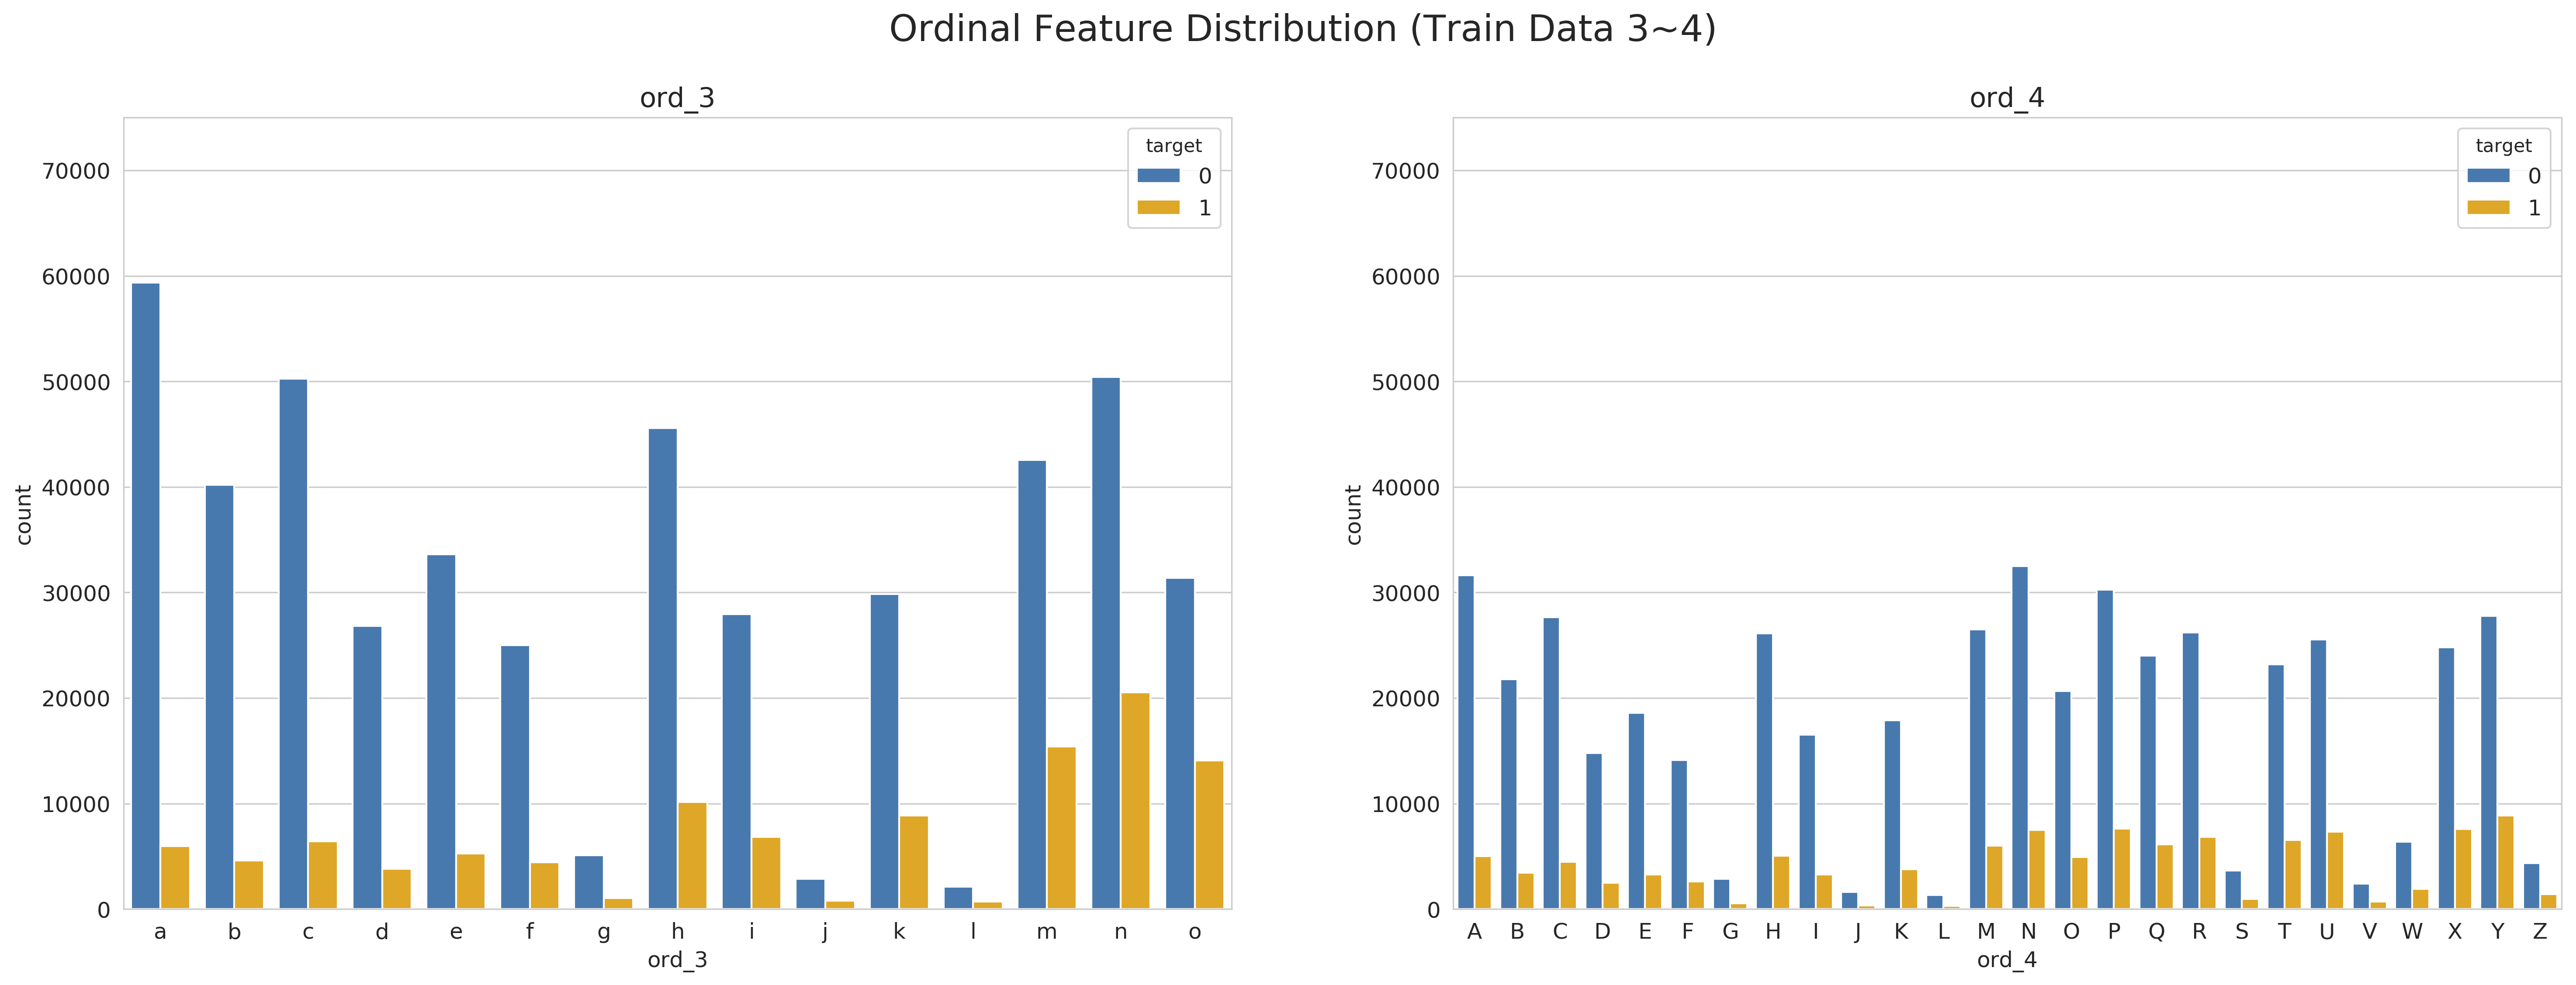

In [23]:
fig, ax = plt.subplots(1,2, figsize=(24, 8))

for i in range(3, 5): 
    sns.countplot(f'ord_{i}', hue='target', data= train, ax=ax[i-3],
                  order = sorted(train[f'ord_{i}'].dropna().unique())
                 )
    ax[i-3].set_ylim([0, 75000])
    ax[i-3].set_title(f'ord_{i}', fontsize=15)
fig.suptitle("Ordinal Feature Distribution (Train Data 3~4)", fontsize=20)
plt.show()

Oddly... it feels like the 2 graphs are gradually expanding...?

Using this part seems to minimize the feature.

In [24]:
for i in range(5):
    data = train[[f'ord_{i}', 'target']].groupby(f'ord_{i}')['target'].value_counts().unstack()
    data['rate'] = data[1]  / (data[0] + data[1] )
    data.sort_values(by=['rate'], inplace=True)
    display(data.style.highlight_max(color='lightgreen').highlight_min(color='#cd4f39'))

**I personally guess**

By sorting the values by the ratio of 1 in the target value, multiple ord features were ordered. This is thought to be intentional when the data is created, and data that is out of sync is considered to be an error from missing values.

---

ord_6 has a large number of unique values, so let's sort them by size.

190


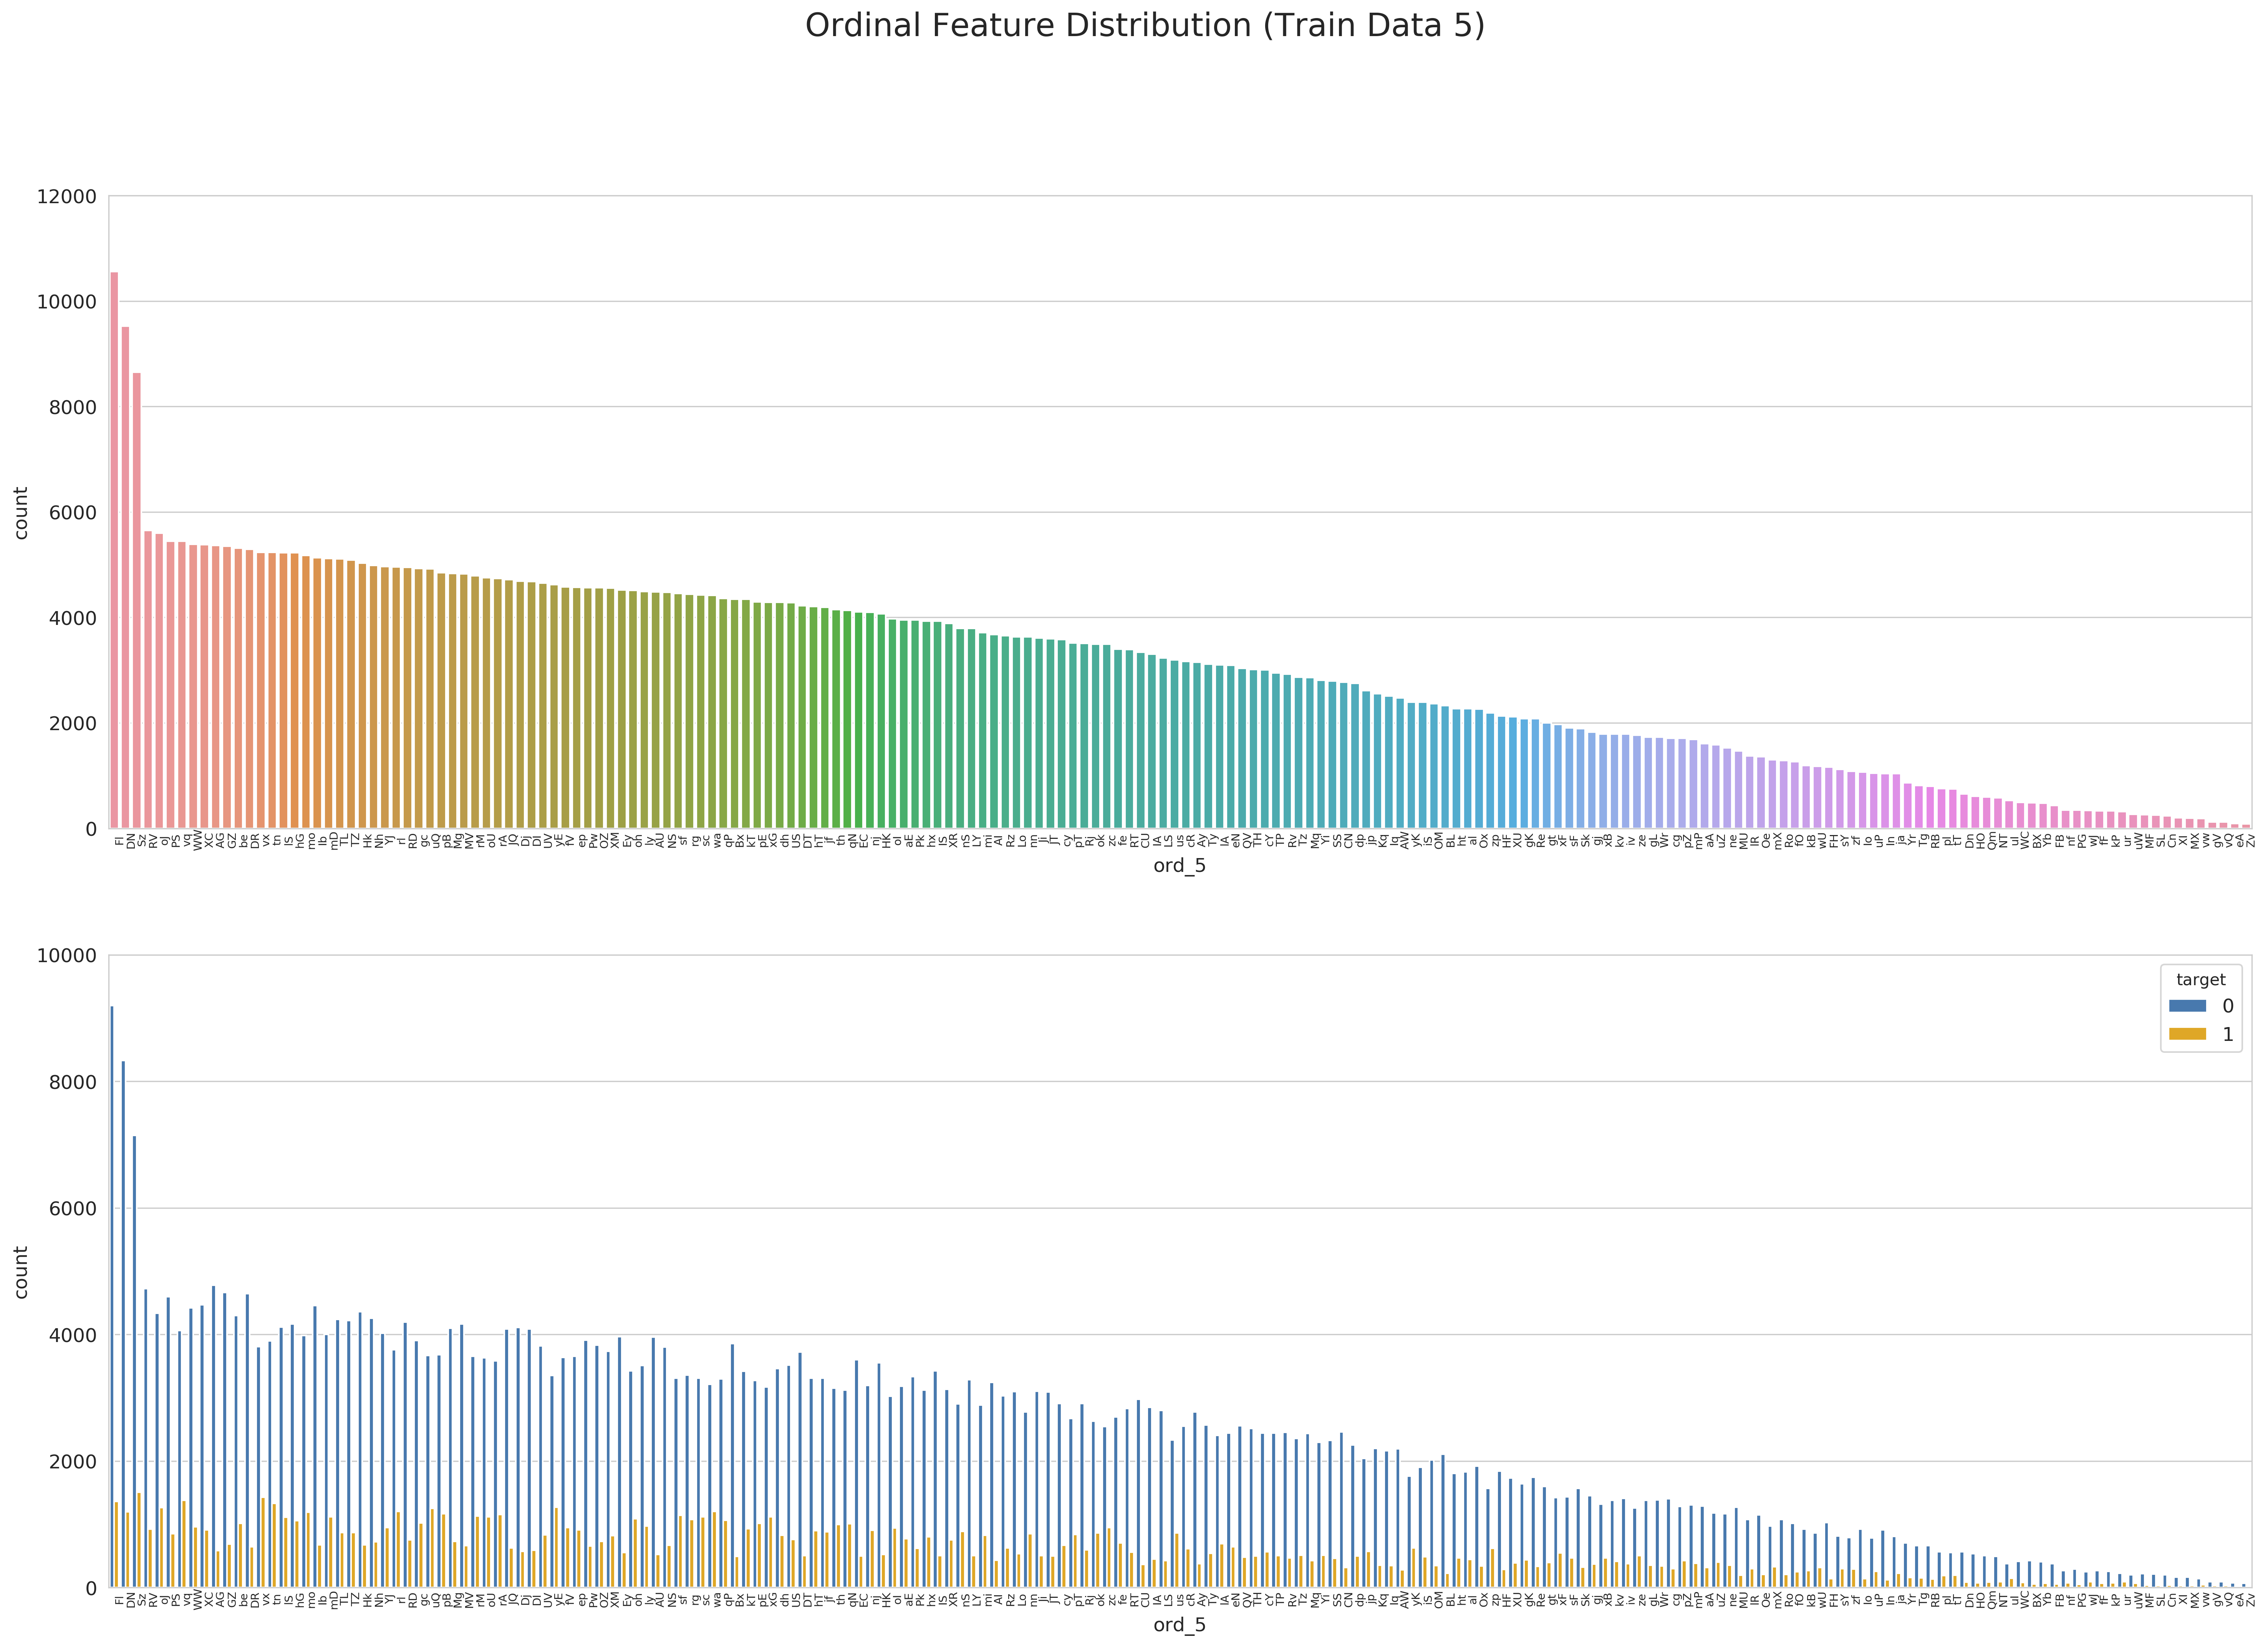

In [25]:
fig, ax = plt.subplots(2,1, figsize=(24, 16))

xlabels = train['ord_5'].dropna().value_counts().index

print(len(xlabels))

# just counting
sns.countplot('ord_5', data= train, ax=ax[0], order = xlabels )
ax[0].set_ylim([0, 12000])
ax[0].set_xticklabels(xlabels, rotation=90, rotation_mode="anchor", fontsize=7)

# with hue
sns.countplot('ord_5', hue='target', data= train, ax=ax[1], order = xlabels )
ax[1].set_ylim([0, 10000])
ax[1].set_xticklabels(xlabels, rotation=90, rotation_mode="anchor", fontsize=7)

fig.suptitle("Ordinal Feature Distribution (Train Data 5)", fontsize=20)
plt.show()

## Day & Month 

TODO : sin & cos transform

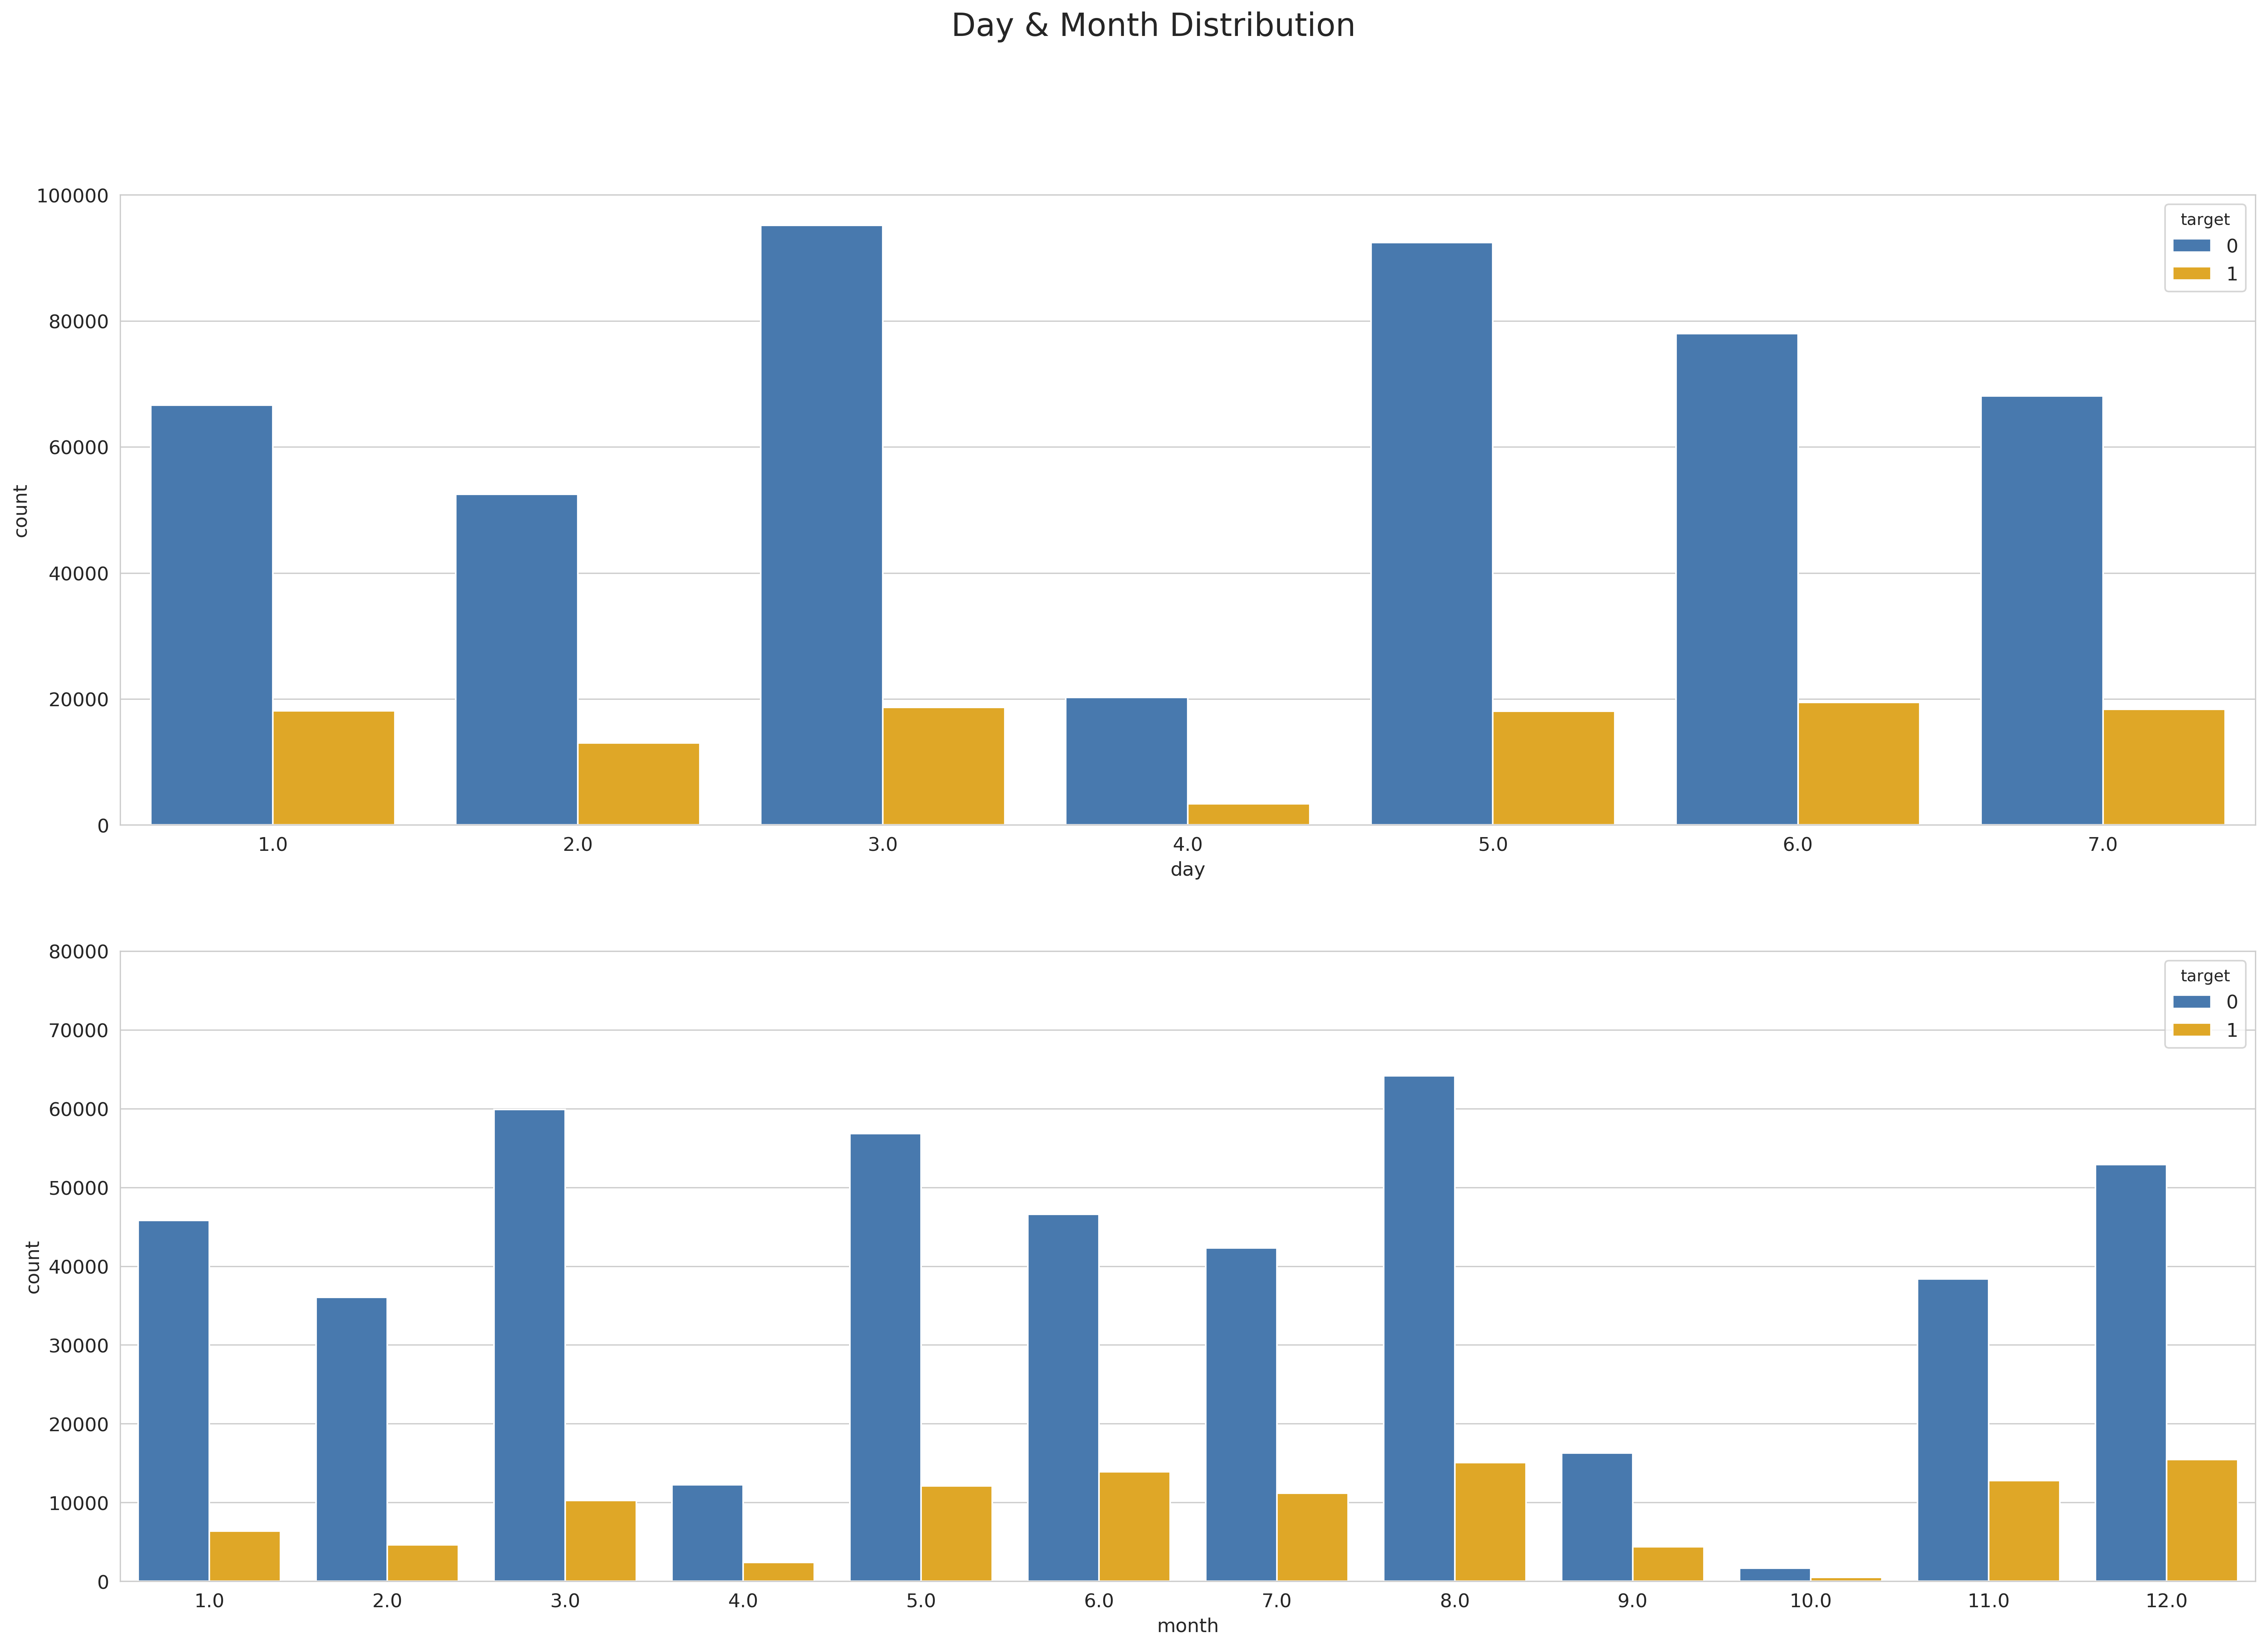

In [26]:
fig, ax = plt.subplots(2,1, figsize=(24, 16))

sns.countplot('day', hue='target', data= train, ax=ax[0])
ax[0].set_ylim([0, 100000])

sns.countplot('month', hue='target', data= train, ax=ax[1])
ax[1].set_ylim([0, 80000])

fig.suptitle("Day & Month Distribution", fontsize=20)
plt.show()

Surprisingly, the graph feels like something else.

> Any advice would be appreciated if it was just me.

In [27]:
data = train[['day', 'target']].groupby('day')['target'].value_counts().unstack()
data['rate'] = data[1]  / (data[0] + data[1] )
data.sort_values(by=['rate'], inplace=True)
display(data.style.highlight_max(color='lightgreen').highlight_min(color='#cd4f39'))

data = train[['month', 'target']].groupby('month')['target'].value_counts().unstack()
data['rate'] = data[1]  / (data[0] + data[1] )
data.sort_values(by=['rate'], inplace=True)
display(data.style.highlight_max(color='lightgreen').highlight_min(color='#cd4f39'))

---

## With Categofical Data with Encoding

To get the correlation, let's do some basic encodings and get the correlation.

### Binary

In [28]:
%%time
bin_encoding = {'F':0, 'T':1, 'N':0, 'Y':1}
train['bin_3'] = train['bin_3'].map(bin_encoding)
train['bin_4'] = train['bin_4'].map(bin_encoding)

test['bin_3'] = test['bin_3'].map(bin_encoding)
test['bin_4'] = test['bin_4'].map(bin_encoding)

CPU times: user 372 ms, sys: 105 ms, total: 477 ms
Wall time: 476 ms


### Nominal

I'll go ahead and target based encoding to believe the relationship between nom_7 and nom_8.

In [29]:
%%time
from category_encoders.target_encoder import TargetEncoder

for i in range(10):
    label = TargetEncoder()
    train[f'nom_{i}'] = label.fit_transform(train[f'nom_{i}'].fillna('NULL'), target)
    test[f'nom_{i}'] = label.transform(test[f'nom_{i}'].fillna('NULL'))

CPU times: user 4.99 s, sys: 265 ms, total: 5.25 s
Wall time: 5.32 s


### Ordinal

In [30]:
%%time
ord_order = [
    [1.0, 2.0, 3.0],
    ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'],
    ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']
]

for i in range(1, 3):
    ord_order_dict = {i : j for j, i in enumerate(ord_order[i])}
    train[f'ord_{i}'] = train[f'ord_{i}'].fillna('NULL').map(ord_order_dict)
    test[f'ord_{i}'] = test[f'ord_{i}'].fillna('NULL').map(ord_order_dict)

CPU times: user 324 ms, sys: 0 ns, total: 324 ms
Wall time: 323 ms


In [31]:
%%time
for i in range(3, 6):
    ord_order_dict = {i : j for j, i in enumerate(sorted(list(set(list(train[f'ord_{i}'].dropna().unique()) + list(test[f'ord_{i}'].dropna().unique())))))}
    train[f'ord_{i}'] = train[f'ord_{i}'].fillna('NULL').map(ord_order_dict)
    test[f'ord_{i}'] = test[f'ord_{i}'].fillna('NULL').map(ord_order_dict)

CPU times: user 662 ms, sys: 904 µs, total: 663 ms
Wall time: 662 ms


In [32]:
train.head()

bin_0  bin_1  bin_2  bin_3  bin_4     nom_0     nom_1     nom_2     nom_3  \
0    0.0    0.0    0.0    0.0    0.0  0.183067  0.225464  0.168014  0.219534   
1    1.0    1.0    0.0    0.0    1.0  0.183067  0.130201  0.201104  0.185862   
2    0.0    1.0    0.0    0.0    0.0  0.183067  0.182805  0.168014  0.159849   
3    NaN    0.0    0.0    0.0    0.0  0.183067  0.179694  0.168014  0.178947   
4    0.0    NaN    0.0    1.0    0.0  0.183067  0.157360  0.168014  0.202836   

      nom_4  ...     nom_9  ord_0  ord_1  ord_2  ord_3  ord_4  ord_5  day  \
0  0.207375  ...  0.164251    3.0    1.0    3.0    2.0   20.0   56.0  6.0   
1  0.179573  ...  0.152830    3.0    4.0    2.0    4.0   23.0  150.0  7.0   
2  0.207375  ...  0.187849    3.0    NaN    0.0   13.0   15.0  105.0  5.0   
3  0.179573  ...  0.268456    1.0    0.0    5.0    0.0    2.0    NaN  3.0   
4  0.185528  ...  0.250000    3.0    4.0    1.0    7.0    2.0   50.0  5.0   

   month  target  
0    3.0       0  
1    7.0       0  
2    9.0       0  
3    3.0       0  
4   12.0       0  

[5 rows x 24 columns]

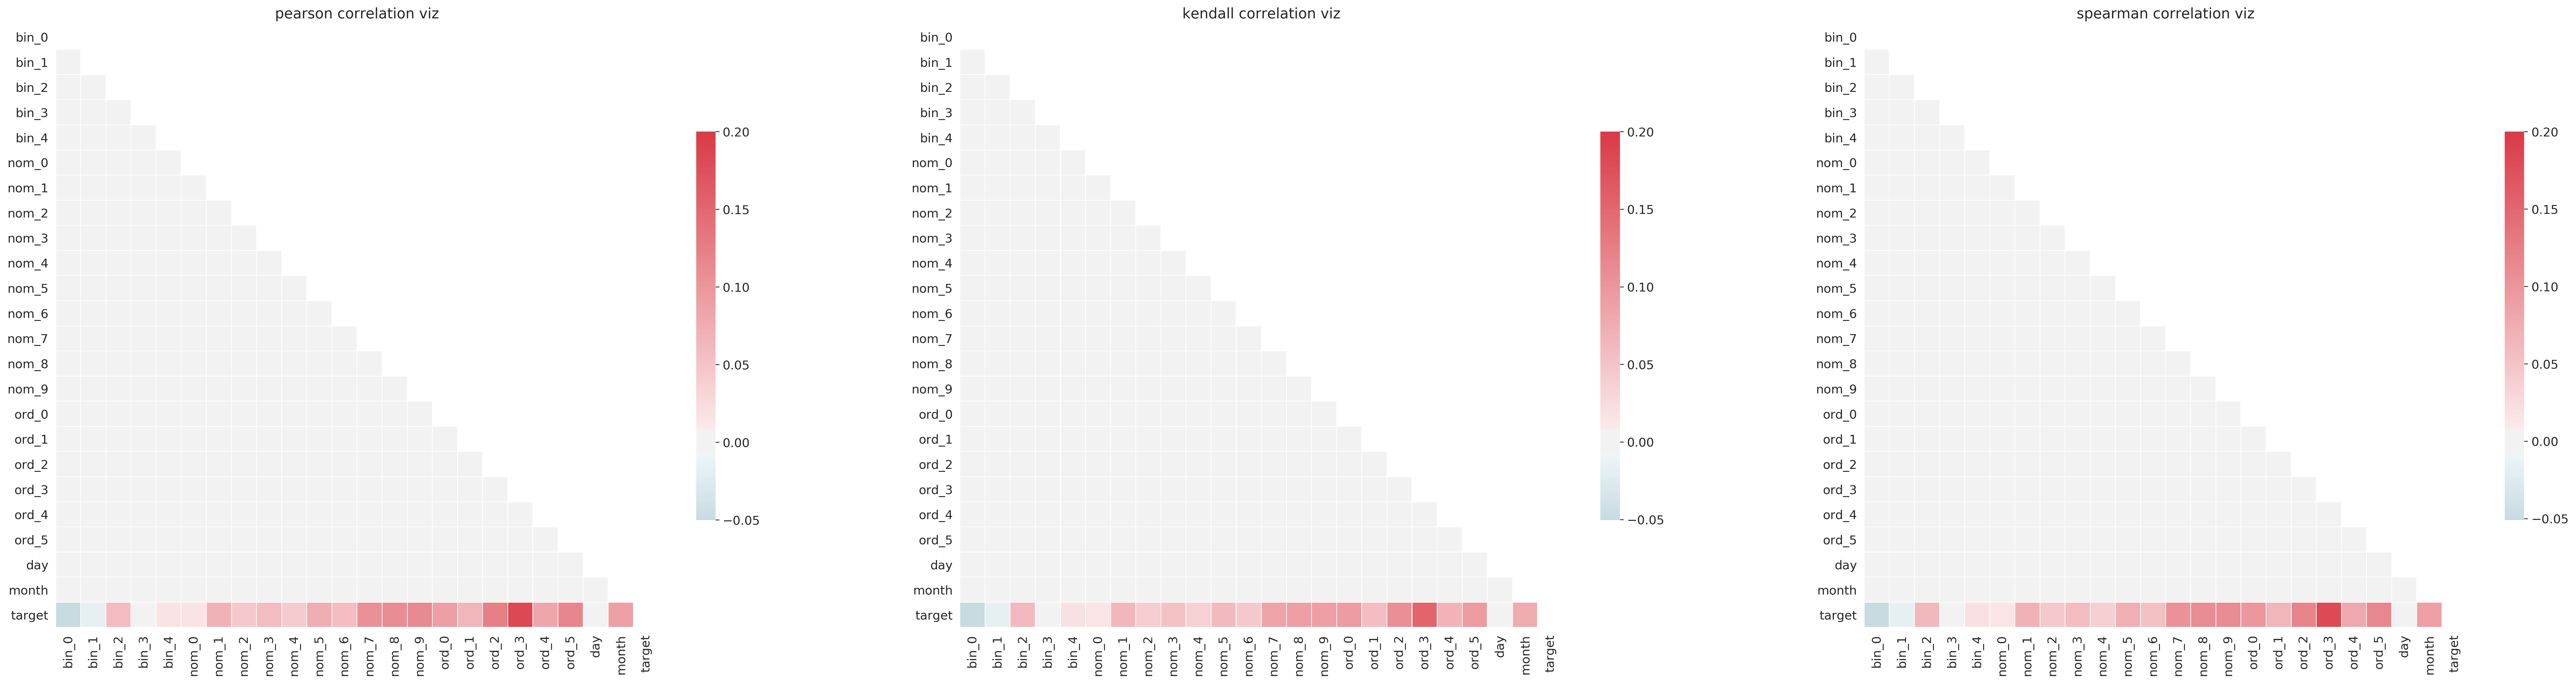

CPU times: user 1min 17s, sys: 3.46 s, total: 1min 20s
Wall time: 1min 16s


In [33]:
%%time
f, ax = plt.subplots(1, 3, figsize=(45, 14))
for idx, tp in  enumerate(['pearson', 'kendall', 'spearman']) :
    corr = train.fillna(-1).corr(tp)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.2, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[idx])
    ax[idx].set_title(f'{tp} correlation viz')
plt.show()

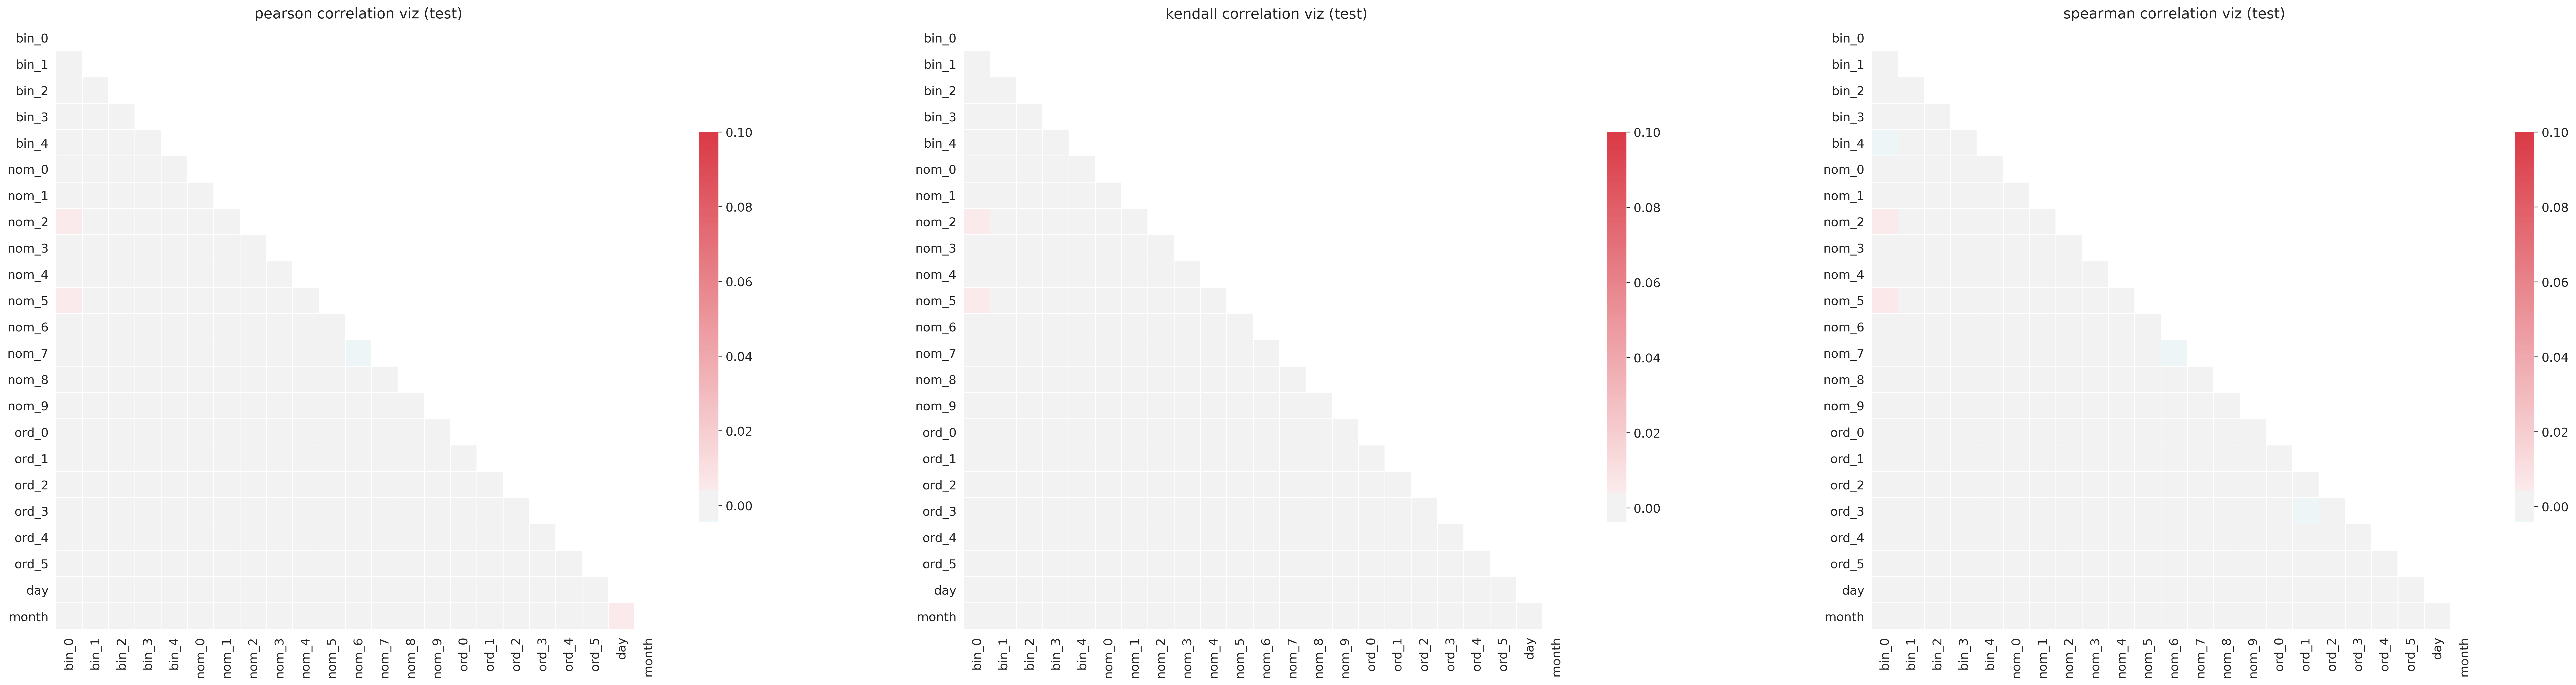

CPU times: user 48.1 s, sys: 3.05 s, total: 51.1 s
Wall time: 47.8 s


In [34]:
%%time
f, ax = plt.subplots(1, 3, figsize=(45, 14))
for idx, tp in  enumerate(['pearson', 'kendall', 'spearman']) :
    corr = test.fillna(-1).corr(tp)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[idx])
    ax[idx].set_title(f'{tp} correlation viz (test)')
plt.show()

First of all, it depends on the encoding, but in the case of `ord`, sorting in order has some correlation with the **target value**.
I think ord is definitely useful as a feature.

If you look at the correlation for other features and find the encoding, I think you will get good insights. (Or target based encoding methods would be nice.)

nom is a target based encoding, so I'll skip further thinking.

I don't know if the features are not correlated with each other. Please let me know in the comments if I made a mistake during the process.


## Keep Going!!